# Search FORS2 galaxies in KIDS catalogs (FITS)

https://www.eso.org/qi/catalogQuery/index/260
https://kids.strw.leidenuniv.nl/DR4/access.php

https://astroquery.readthedocs.io/en/latest/ukidss/ukidss.html



- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023-06-07
- last update : 2023-06-15


In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astroquery.ukidss import Ukidss
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.coordinates as coordinates
from astropy.coordinates import angular_separation
#(lon1, lat1, lon2, lat2)
from astropy.coordinates import Angle
import astropy.units as u
import h5py
import pandas as pd
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table

In [2]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    

    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [3]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info
    

## Catalogs

In [4]:
Ukidss.list_catalogs()

['LAS', 'GPS', 'GCS', 'DXS', 'UDS']

In [5]:
Ukidss.list_catalogs(style='long')

['Large Area Survey',
 'Galactic Plane Survey',
 'Galactic Clusters Survey',
 'Deep Extragalactic Survey',
 'Ultra Deep Survey']

In [6]:
path =  "../data/KIDS_Photometry"
filenames_kidscat = os.listdir(path)

In [7]:
!ls ../data/KIDS_Photometry

KIDScat_ugriZYJHKs.fits


In [8]:
if '.DS_Store' in filenames_kidscat:
    filenames_kidscat.remove('.DS_Store')

In [9]:
all_hdu = []
all_tables = []
for idx,filename  in enumerate(filenames_kidscat):
    fullfilename = os.path.join(path,filename)
    hdu = fits.open(fullfilename)
    all_hdu.append(hdu)
    all_tables.append(Table(hdu[1].data))

In [10]:
all_hdu[0].info()

Filename: ../data/KIDS_Photometry/KIDScat_ugriZYJHKs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  PHASE3CATALOG    1 BinTableHDU   1903   29628R x 306C   ['30A', '16A', '16A', 'J', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'J', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'J', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'I', 'I', 'I', 'I', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'D', 'D', 'I', '

In [11]:
all_tables[0]

<Table length=29628>
              ID                  KIDS_TILE        THELI_NAME    SeqNr   SLID    SID  FLUX_AUTO FLUXERR_AUTO MAG_AUTO MAGERR_AUTO  ... SG_FLAG  MASK COLOUR_GAAP_u_g COLOUR_GAAP_g_r COLOUR_GAAP_r_i COLOUR_GAAP_i_Z COLOUR_GAAP_Z_Y COLOUR_GAAP_Y_J COLOUR_GAAP_J_H COLOUR_GAAP_H_Ks
            str30                   str16            str16       int32  int32   int32  float32    float32    float32    float32    ... float32 int32     float32         float32         float32         float32         float32         float32         float32         float32     
------------------------------ ---------------- ---------------- ----- -------- ----- --------- ------------ -------- ------------ ... ------- ----- --------------- --------------- --------------- --------------- --------------- --------------- --------------- ----------------
KiDSDR4 J005347.585-283857.70  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9788 60524871  9787  1.792366    0.2168813 23.98643     0.131409 ...     1.0     0             nan      0.38112068       0.5360794     -0.40361595       0.5710335       0.5077324      0.76218605       -0.5817604
KiDSDR4 J005311.072-283857.09  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9792 60524871  9791  1.763996    0.1854692 24.00376    0.1141836 ...     1.0     0             nan        1.089756      0.33369255        0.338974      0.43106842      0.23840523      -0.7210636        0.8198681
KiDSDR4 J005325.757-283857.40  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9793 60524871  9792 0.8609689    0.1892385 24.78253    0.2386997 ...     1.0     0             nan     -0.02897644       0.1688137      -1.6983662       1.5230904       2.3125572      -0.7901306       -2.4899101
KiDSDR4 J005304.514-283856.87  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9794 60524871  9793  1.462091    0.2010806 24.20757     0.149357 ...     1.0     0       1.0057869     -0.12133217      0.34009743      -1.3721733             nan             nan      0.26146317              nan
KiDSDR4 J005450.518-283856.99  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9795 60524871  9794   2.68689    0.2305608 23.54688   0.09318916 ...     1.0     0      0.48631668       0.8893299      0.14453697        0.293684     -0.02460289       1.2780533      -1.2106571        1.4400539
KiDSDR4 J005347.653-283857.46  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9801 60524871  9800  1.543747    0.1781365 24.14856     0.125316 ...     1.0     0             nan       0.5788212      0.66298866     -0.83252907       1.0466366     -0.20216942       1.5497856       -0.6218605
KiDSDR4 J005315.233-283857.13  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9802 60524871  9801  1.610704    0.2303713 24.10246    0.1553254 ...     1.0     0      -0.6303139       0.9805336      0.46965218        -2.62426       1.6167545       1.4663658             nan              0.0
KiDSDR4 J005449.014-283856.72  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9803 60524871  9802 0.4734921    0.1274198 25.43172    0.2922497 ...     1.0     0             nan       1.3416061      0.16507149    -0.083257675      0.67721367       0.6469898             nan              nan
KiDSDR4 J005335.755-283857.27  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9804 60524871  9803  1.806971    0.2124607 23.97762    0.1276901 ...     1.0     0             nan      0.34791756       0.8308811    -0.027906418             nan             nan      -0.2594986       -0.7197933
KiDSDR4 J005333.170-283857.15  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9806 60524871  9805  1.362736     0.204879 24.28397    0.1632734 ...     1.0     0      -0.4850216      0.70469856      0.42612267       0.5231285      0.63791656      0.41040993      -2.3461933        2.5060081
KiDSDR4 J005300.341-283856.51  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9807 60524871  9806  1.520628    0.2342747 24.16494    0.1673139 ...     1.0     0       -0.759922       0.5942879       1.3162518      -0.5983238       1.0273228      -0.9558811      0.12721634       0.06851387
KiDSDR4 J005350.081-283857.24  KIDS_13.5_-28.2  KIDS_13p5_m28p2   9810 60524871  9809 0

In [12]:
all_tables[0].columns

<TableColumns names=('ID','KIDS_TILE','THELI_NAME','SeqNr','SLID','SID','FLUX_AUTO','FLUXERR_AUTO','MAG_AUTO','MAGERR_AUTO','KRON_RADIUS','BackGr','Level','MU_THRESHOLD','MaxVal','MU_MAX','ISOAREA_WORLD','Xpos','Ypos','RAJ2000','DECJ2000','A_WORLD','B_WORLD','THETA_J2000','THETA_WORLD','ERRA_WORLD','ERRB_WORLD','ERRTHETA_J2000','ERRTHETA_WORLD','FWHM_IMAGE','FWHM_WORLD','Flag','FLUX_RADIUS','CLASS_STAR','EXTINCTION_u','EXTINCTION_g','EXTINCTION_r','EXTINCTION_i','Agaper_0p7','Bgaper_0p7','Agaper_1p0','Bgaper_1p0','PAgaap','FLAG_GAAP_0p7_u','FLAG_GAAP_0p7_g','FLAG_GAAP_0p7_r','FLAG_GAAP_0p7_i','FLUX_GAAP_0p7_u','FLUX_GAAP_0p7_g','FLUX_GAAP_0p7_r','FLUX_GAAP_0p7_i','FLUXERR_GAAP_0p7_u','FLUXERR_GAAP_0p7_g','FLUXERR_GAAP_0p7_r','FLUXERR_GAAP_0p7_i','FLAG_GAAP_1p0_u','FLAG_GAAP_1p0_g','FLAG_GAAP_1p0_r','FLAG_GAAP_1p0_i','FLUX_GAAP_1p0_u','FLUX_GAAP_1p0_g','FLUX_GAAP_1p0_r','FLUX_GAAP_1p0_i','FLUXERR_GAAP_1p0_u','FLUXERR_GAAP_1p0_g','FLUXERR_GAAP_1p0_r','FLUXERR_GAAP_1p0_i','MAG_ISO','MAGER

## Read FORS2 catalog

In [13]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [14]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [15]:
df_info = ReadFors2h5FileAttributes(hf)

In [16]:
df_info = df_info[['num', 'ra', 'dec', 'Rmag','redshift']]

In [17]:
df_info.reset_index(drop=True, inplace=True) 

In [18]:
df_info

num        ra       dec   Rmag  redshift
0      2  13.52997 -28.44776  21.18   0.34555
1      3  13.52552 -28.42080  21.45   0.68660
2      9  13.50219 -28.40641  21.60   0.29266
3     13  13.49261 -28.38272  23.14   0.68870
4     19  13.60758 -28.43452  21.70   0.48395
..   ...       ...       ...    ...       ...
545  734  13.68083 -28.23290   0.00   0.23012
546  735  13.69958 -28.23161  19.28   0.36169
547  736  13.66431 -28.22849  21.64   0.55777
548  737  13.62722 -28.22692  21.40   0.52001
549  738  13.64370 -28.22527  19.73   0.56044

[550 rows x 5 columns]

## Get FORS2 spectra

In [19]:
df_info_num = df_info["num"].values
key_tags = [ f"SPEC{num}" for num in df_info_num ]

In [20]:
all_df = []   
idx=0
for key in key_tags :
    group = hf.get(key)
    df = pd.DataFrame()
    df["wl"] = np.array(group.get("wl"))
    df["fl"] = np.array(group.get("fl")) 
    all_df.append(df)
    idx+=1

## KIDS catalog

### find central cluster coordinates

In [21]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [22]:
result_table = Simbad.query_object(target_name_simbad)

In [23]:
result_table

<Table length=1>
      MAIN_ID            RA        DEC    RA_PREC DEC_PREC COO_ERR_MAJA COO_ERR_MINA COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
                      "h:m:s"    "d:m:s"                       mas          mas           deg                                                                  
       object          str13      str13    int16   int16     float32      float32        int16       str1        str1             object            int32      
-------------------- ---------- --------- ------- -------- ------------ ------------ ------------- -------- -------------- ------------------- ----------------
BAX 013.5117-28.3994 00 54 02.8 -28 23 58       5        5           --           --             0        D                1998ApJ...502..558V                1

In [24]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [25]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

In [26]:
coord.ra.deg

13.511666666666665

In [27]:
coord.dec.deg

-28.399444444444445

In [28]:
result_table = all_tables[0]

In [29]:
result_ptable = result_table.to_pandas()
result_ptable.head()

ID         KIDS_TILE        THELI_NAME  SeqNr   
0  KiDSDR4 J005347.585-283857.70   KIDS_13.5_-28.2   KIDS_13p5_m28p2    9788  \
1  KiDSDR4 J005311.072-283857.09   KIDS_13.5_-28.2   KIDS_13p5_m28p2    9792   
2  KiDSDR4 J005325.757-283857.40   KIDS_13.5_-28.2   KIDS_13p5_m28p2    9793   
3  KiDSDR4 J005304.514-283856.87   KIDS_13.5_-28.2   KIDS_13p5_m28p2    9794   
4  KiDSDR4 J005450.518-283856.99   KIDS_13.5_-28.2   KIDS_13p5_m28p2    9795   

       SLID   SID  FLUX_AUTO  FLUXERR_AUTO   MAG_AUTO  MAGERR_AUTO  ...   
0  60524871  9787   1.792366      0.216881  23.986429     0.131409  ...  \
1  60524871  9791   1.763996      0.185469  24.003759     0.114184  ...   
2  60524871  9792   0.860969      0.189239  24.782530     0.238700  ...   
3  60524871  9793   1.462091      0.201081  24.207569     0.149357  ...   
4  60524871  9794   2.686890      0.230561  23.546881     0.093189  ...   

   SG_FLAG  MASK  COLOUR_GAAP_u_g  COLOUR_GAAP_g_r  COLOUR_GAAP_r_i   
0      1.0     0              NaN         0.381121         0.536079  \
1      1.0     0              NaN         1.089756         0.333693   
2      1.0     0              NaN        -0.028976         0.168814   
3      1.0     0         1.005787        -0.121332         0.340097   
4      1.0     0         0.486317         0.889330         0.144537   

   COLOUR_GAAP_i_Z  COLOUR_GAAP_Z_Y  COLOUR_GAAP_Y_J  COLOUR_GAAP_J_H   
0        -0.403616         0.571033         0.507732         0.762186  \
1         0.338974         0.431068         0.238405        -0.721064   
2        -1.698366         1.523090         2.312557        -0.790131   
3        -1.372173              NaN              NaN         0.261463   
4         0.293684        -0.024603         1.278053        -1.210657   

   COLOUR_GAAP_H_Ks  
0         -0.581760  
1          0.819868  
2         -2.489910  
3               NaN  
4          1.440054  

[5 rows x 306 columns]

In [30]:
#for colname in result_ptable.columns:
#    print(colname)

In [31]:
N = len(result_table)

In [32]:
#all_ra = np.array([ Angle(result_table['RA'][idx] + ' hours').deg for idx in range(N) ])
#all_dec = np.array([ Angle(result_table['DEC'][idx] + ' degrees').deg for idx in range(N) ])

In [33]:
all_ra = np.array([result_table['RAJ2000'][idx] for idx in range(N) ])
all_dec = np.array([result_table['DECJ2000'][idx]  for idx in range(N) ])

In [34]:
catalog_kids = SkyCoord(all_ra*u.degree,all_dec*u.degree)

https://docs.astropy.org/en/stable/coordinates/matchsep.html#astropy-coordinates-matching

In [35]:
all_idx = []  # index of the match
all_d2d = []  # distance in arcsec
all_d3d = []

for index, row in df_info.iterrows():
    c = coordinates.SkyCoord(row['ra']*u.degree, row['dec']*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog_kids)
    all_idx.append(int(idx))
    all_d2d.append(Angle(d2d[0]).arcsec)
    all_d3d.append(d3d)
    #print(idx,Angle(d2d[0]).arcsec,d3d)
    


In [36]:
all_idx = np.array(all_idx)

Text(0.5, 0, 'cross-match angle in arcsec')

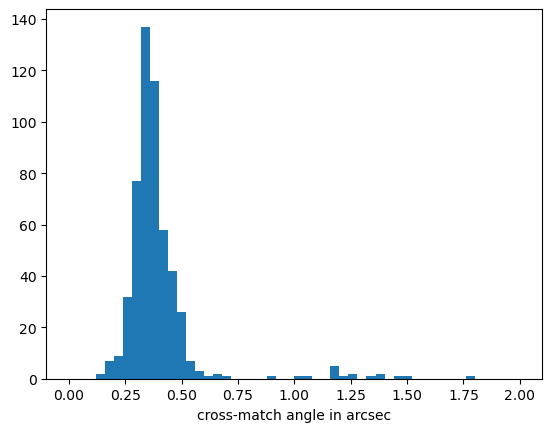

In [37]:
plt.hist(all_d2d,bins=50,range=(0,2));
plt.xlabel("cross-match angle in arcsec")

# Extract magnitudes

In [38]:
result_ptable["MAG_GAAP_u"].head()

0          NaN
1          NaN
2          NaN
3    24.936752
4    24.941830
Name: MAG_GAAP_u, dtype: float32

In [39]:
result_ptable["MAG_GAAP_g"].head()

0    24.149288
1    24.984371
2    24.543087
3    23.930965
4    24.455513
Name: MAG_GAAP_g, dtype: float32

In [40]:
result_ptable["MAG_GAAP_r"].head()

0    23.768167
1    23.894615
2    24.572063
3    24.052298
4    23.566183
Name: MAG_GAAP_r, dtype: float32

In [41]:
result_ptable["MAG_GAAP_i"].head()

0    23.232088
1    23.560923
2    24.403250
3    23.712200
4    23.421646
Name: MAG_GAAP_i, dtype: float32

In [42]:
result_ptable["MAG_GAAP_Z"].head()

0    23.635704
1    23.221949
2    26.101616
3    25.084373
4    23.127962
Name: MAG_GAAP_Z, dtype: float32

In [43]:
result_ptable["MAG_GAAP_Y"].head()

0    23.064671
1    22.790880
2    24.578526
3          NaN
4    23.152565
Name: MAG_GAAP_Y, dtype: float32

In [44]:
result_ptable["MAG_GAAP_J"].head()

0    22.556938
1    22.552475
2    22.265968
3    22.837746
4    21.874512
Name: MAG_GAAP_J, dtype: float32

In [45]:
result_ptable["MAG_GAAP_H"].head()

0    21.794752
1    23.273539
2    23.056099
3    22.576283
4    23.085169
Name: MAG_GAAP_H, dtype: float32

In [46]:
result_ptable["MAG_GAAP_Ks"].head()

0    22.376513
1    22.453671
2    25.546009
3          NaN
4    21.645115
Name: MAG_GAAP_Ks, dtype: float32

In [47]:
SelectedColumns = ["ID" ,"KIDS_TILE","RAJ2000","DECJ2000","FLUX_RADIUS","CLASS_STAR",
"MAG_GAAP_u","MAG_GAAP_g","MAG_GAAP_r","MAG_GAAP_i","MAG_GAAP_Z","MAG_GAAP_Y","MAG_GAAP_J","MAG_GAAP_H","MAG_GAAP_Ks",
                   "MAGERR_GAAP_u","MAGERR_GAAP_g","MAGERR_GAAP_r","MAGERR_GAAP_i","MAGERR_GAAP_Z","MAGERR_GAAP_Y","MAGERR_GAAP_J","MAGERR_GAAP_H","MAGERR_GAAP_Ks",
                   'FLUX_GAAP_u','FLUXERR_GAAP_u','FLUX_GAAP_g','FLUXERR_GAAP_g','FLUX_GAAP_r','FLUXERR_GAAP_r','FLUX_GAAP_i','FLUXERR_GAAP_i',
                   'FLUX_GAAP_Z','FLUXERR_GAAP_Z','FLUX_GAAP_Y','FLUXERR_GAAP_Y','FLUX_GAAP_J','FLUXERR_GAAP_J','FLUX_GAAP_H','FLUXERR_GAAP_H','FLUX_GAAP_Ks','FLUXERR_GAAP_Ks',
                   "Z_B","Z_ML","EXTINCTION_u","EXTINCTION_g","EXTINCTION_r","EXTINCTION_i"]

In [48]:
result_ptable= result_ptable[SelectedColumns]

In [49]:
result_ptable

ID         KIDS_TILE    RAJ2000   DECJ2000   
0      KiDSDR4 J005347.585-283857.70   KIDS_13.5_-28.2   13.448272 -28.649362  \
1      KiDSDR4 J005311.072-283857.09   KIDS_13.5_-28.2   13.296137 -28.649193   
2      KiDSDR4 J005325.757-283857.40   KIDS_13.5_-28.2   13.357325 -28.649280   
3      KiDSDR4 J005304.514-283856.87   KIDS_13.5_-28.2   13.268810 -28.649131   
4      KiDSDR4 J005450.518-283856.99   KIDS_13.5_-28.2   13.710493 -28.649166   
...                               ...               ...        ...        ...   
29623  KiDSDR4 J005301.337-280922.65   KIDS_13.5_-28.2   13.255574 -28.156294   
29624  KiDSDR4 J005440.218-280935.40   KIDS_13.5_-28.2   13.667578 -28.159836   
29625  KiDSDR4 J005432.556-280907.23   KIDS_13.5_-28.2   13.635652 -28.152010   
29626  KiDSDR4 J005324.762-280900.91   KIDS_13.5_-28.2   13.353177 -28.150255   
29627  KiDSDR4 J005432.189-280919.86   KIDS_13.5_-28.2   13.634125 -28.155518   

       FLUX_RADIUS  CLASS_STAR  MAG_GAAP_u  MAG_GAAP_g  MAG_GAAP_r   
0         3.074759    0.087846         NaN   24.149288   23.768167  \
1         2.204050    0.024639         NaN   24.984371   23.894615   
2         1.996444    0.453629         NaN   24.543087   24.572063   
3         3.169912    0.644952   24.936752   23.930965   24.052298   
4         2.547129    0.086659   24.941830   24.455513   23.566183   
...            ...         ...         ...         ...         ...   
29623     5.790458    0.765856   17.407341   15.914205         NaN   
29624     6.967954    0.840779   15.367549         NaN         NaN   
29625     2.356473    0.865335   17.675791   16.507570   16.123501   
29626     2.142460    0.856969   17.644361   16.721621   16.421577   
29627     5.049398    0.028683   19.396729   16.866014         NaN   

       MAG_GAAP_i  ...   FLUX_GAAP_H  FLUXERR_GAAP_H  FLUX_GAAP_Ks   
0       23.232088  ...  1.902139e+03      560.302429  1.115555e+03  \
1       23.560923  ...  4.872540e+02      515.479370  1.039011e+03   
2       24.403250  ...  5.953521e+02      501.924835  6.021758e+01   
3       23.712200  ...  9.261805e+02      506.579468           NaN   
4       23.421646  ...  5.780942e+02      486.451935  2.184439e+03   
...           ...  ...           ...             ...           ...   
29623   15.101517  ...  1.027113e+06      774.257690  7.586074e+05   
29624         NaN  ...  2.123390e+06      627.935059  1.515850e+06   
29625   15.940156  ...  3.798986e+05      412.516327  2.719075e+05   
29626   16.308752  ...  2.446445e+05      523.583557  1.681598e+05   
29627   15.184169  ...  1.575325e+06      572.598389  1.218316e+06   

       FLUXERR_GAAP_Ks   Z_B  Z_ML  EXTINCTION_u  EXTINCTION_g  EXTINCTION_r   
0           714.054138  0.69  2.82      0.067433      0.052544      0.036350  \
1           583.662354  0.52  0.19      0.066615      0.051906      0.035908   
2           614.736572  1.61  1.96      0.066055      0.051470      0.035607   
3                  NaN  1.89  2.54      0.066197      0.051580      0.035683   
4           502.354218  0.28  0.24      0.092741      0.072263      0.049991   
...                ...   ...   ...           ...           ...           ...   
29623       816.501709  0.05  0.05      0.099742      0.077718      0.053765   
29624       765.995178  0.01  0.01      0.078787      0.061390      0.042470   
29625       499.982361  0.04  0.04      0.080823      0.062977      0.043567   
29626       538.383484  0.01  0.01      0.101493      0.079083      0.054709   
29627       695.093323  0.20  0.20      0.080891      0.063030      0.043604   

       EXTINCTION_i  
0          0.027012  
1          0.026684  
2          0.026460  
3          0.026516  
4          0.037149  
...             ...  
29623      0.039953  
29624      0.031560  
29625      0.032375  
29626      0.040655  
29627      0.032402  

[29628 rows x 48 columns]

## Create extended info dataframe

In [50]:
df_info_extended = pd.DataFrame(columns=SelectedColumns)

In [51]:
df_info_extended

Empty DataFrame
Columns: [ID, KIDS_TILE, RAJ2000, DECJ2000, FLUX_RADIUS, CLASS_STAR, MAG_GAAP_u, MAG_GAAP_g, MAG_GAAP_r, MAG_GAAP_i, MAG_GAAP_Z, MAG_GAAP_Y, MAG_GAAP_J, MAG_GAAP_H, MAG_GAAP_Ks, MAGERR_GAAP_u, MAGERR_GAAP_g, MAGERR_GAAP_r, MAGERR_GAAP_i, MAGERR_GAAP_Z, MAGERR_GAAP_Y, MAGERR_GAAP_J, MAGERR_GAAP_H, MAGERR_GAAP_Ks, FLUX_GAAP_u, FLUXERR_GAAP_u, FLUX_GAAP_g, FLUXERR_GAAP_g, FLUX_GAAP_r, FLUXERR_GAAP_r, FLUX_GAAP_i, FLUXERR_GAAP_i, FLUX_GAAP_Z, FLUXERR_GAAP_Z, FLUX_GAAP_Y, FLUXERR_GAAP_Y, FLUX_GAAP_J, FLUXERR_GAAP_J, FLUX_GAAP_H, FLUXERR_GAAP_H, FLUX_GAAP_Ks, FLUXERR_GAAP_Ks, Z_B, Z_ML, EXTINCTION_u, EXTINCTION_g, EXTINCTION_r, EXTINCTION_i]
Index: []

[0 rows x 48 columns]

In [52]:
N = len(df_info)
for index in range (N):
    index_kids_table = all_idx[index]
    df_info_extended.loc[index] = result_ptable.iloc[index_kids_table].values

In [53]:
df_info_extended

ID         KIDS_TILE    RAJ2000   DECJ2000   
0    KiDSDR4 J005407.202-282652.18   KIDS_13.5_-28.2   13.530012 -28.447828  \
1    KiDSDR4 J005406.135-282515.22   KIDS_13.5_-28.2   13.525566 -28.420897   
2    KiDSDR4 J005400.531-282423.36   KIDS_13.5_-28.2   13.502216 -28.406491   
3    KiDSDR4 J005358.235-282258.04   KIDS_13.5_-28.2   13.492649  -28.38279   
4    KiDSDR4 J005425.830-282604.52   KIDS_13.5_-28.2   13.607625 -28.434589   
..                              ...               ...        ...        ...   
545  KiDSDR4 J005443.393-281358.14   KIDS_13.5_-28.2   13.680807 -28.232817   
546  KiDSDR4 J005447.902-281354.13   KIDS_13.5_-28.2   13.699594 -28.231703   
547  KiDSDR4 J005439.434-281343.01   KIDS_13.5_-28.2   13.664309 -28.228614   
548  KiDSDR4 J005430.535-281337.17   KIDS_13.5_-28.2   13.627233 -28.226992   
549  KiDSDR4 J005434.488-281331.13   KIDS_13.5_-28.2   13.643701 -28.225315   

    FLUX_RADIUS CLASS_STAR  MAG_GAAP_u MAG_GAAP_g MAG_GAAP_r MAG_GAAP_i  ...   
0      2.967994   0.042723         NaN  22.848028  21.570145  20.993923  ...  \
1      3.020974   0.026643   23.346855  22.941315  21.863623  21.148308  ...   
2      2.671784     0.0414         NaN  23.450844  21.977757   21.55843  ...   
3      2.192928   0.577261   23.861921  23.616484  23.223907  23.105886  ...   
4      2.992076   0.087973   24.186991  23.808002  22.011513  21.487328  ...   
..          ...        ...         ...        ...        ...        ...  ...   
545    3.462931   0.028894   22.124575  21.183992  20.361795  20.002121  ...   
546    3.587435   0.031675   23.698568  21.267984  19.724001  19.231585  ...   
547    4.769248   0.005216   23.172825  23.063156  22.264561  22.297144  ...   
548    2.864109   0.030425   23.499617  22.918249  21.776768   21.20969  ...   
549    7.467356   0.027413         NaN  22.706316  20.832485  19.861431  ...   

      FLUX_GAAP_H FLUXERR_GAAP_H  FLUX_GAAP_Ks FLUXERR_GAAP_Ks   Z_B  Z_ML   
0     12903.00293     594.538757  17751.279297      694.397217  0.64  0.65  \
1    11632.511719     588.559448  17807.927734      685.337463  0.76  0.76   
2     5803.071777     579.864075   6177.433594      606.197693  0.38  0.24   
3             NaN            NaN           NaN             NaN  0.79  0.79   
4     6213.995117     544.024658   8170.591309      507.931976  0.38  0.39   
..            ...            ...           ...             ...   ...   ...   
545   24159.40625     461.214691  23504.554688      495.400299  0.16  0.15   
546   59702.46875     479.774139  63621.417969      521.821655   0.4   0.4   
547   1942.184204     429.756744   3066.119873      456.459747  0.55  0.56   
548  11571.863281      419.07962   13462.80957      434.556122   0.7   0.7   
549  52789.175781     464.924103  60657.605469      490.705872  0.61  0.61   

    EXTINCTION_u EXTINCTION_g EXTINCTION_r EXTINCTION_i  
0       0.072517     0.056505      0.03909     0.029048  
1       0.075065      0.05849     0.040463     0.030069  
2       0.074299     0.057893      0.04005     0.029762  
3       0.077572     0.060444     0.041815     0.031073  
4       0.075642      0.05894     0.040774       0.0303  
..           ...          ...          ...          ...  
545     0.073033     0.056906     0.039368     0.029254  
546     0.072326     0.056356     0.038987     0.028971  
547     0.074087     0.057728     0.039936     0.029677  
548     0.079347     0.061827     0.042772     0.031784  
549     0.078741     0.061355     0.042445     0.031541  

[550 rows x 48 columns]

In [54]:
df_info_extended["angularsep"] = all_d2d

## concatenate the pandas dataframe

- be carefull to have the indexes increasing from to to N (otherwise the merging is done on pandas dataframe index number)

In [55]:
df_info_concatenated = pd.concat([df_info, df_info_extended], axis=1)

In [56]:
df_info_concatenated

num        ra       dec   Rmag  redshift                              ID   
0      2  13.52997 -28.44776  21.18   0.34555  KiDSDR4 J005407.202-282652.18   \
1      3  13.52552 -28.42080  21.45   0.68660  KiDSDR4 J005406.135-282515.22    
2      9  13.50219 -28.40641  21.60   0.29266  KiDSDR4 J005400.531-282423.36    
3     13  13.49261 -28.38272  23.14   0.68870  KiDSDR4 J005358.235-282258.04    
4     19  13.60758 -28.43452  21.70   0.48395  KiDSDR4 J005425.830-282604.52    
..   ...       ...       ...    ...       ...                             ...   
545  734  13.68083 -28.23290   0.00   0.23012  KiDSDR4 J005443.393-281358.14    
546  735  13.69958 -28.23161  19.28   0.36169  KiDSDR4 J005447.902-281354.13    
547  736  13.66431 -28.22849  21.64   0.55777  KiDSDR4 J005439.434-281343.01    
548  737  13.62722 -28.22692  21.40   0.52001  KiDSDR4 J005430.535-281337.17    
549  738  13.64370 -28.22527  19.73   0.56044  KiDSDR4 J005434.488-281331.13    

            KIDS_TILE    RAJ2000   DECJ2000 FLUX_RADIUS  ... FLUXERR_GAAP_H   
0    KIDS_13.5_-28.2   13.530012 -28.447828    2.967994  ...     594.538757  \
1    KIDS_13.5_-28.2   13.525566 -28.420897    3.020974  ...     588.559448   
2    KIDS_13.5_-28.2   13.502216 -28.406491    2.671784  ...     579.864075   
3    KIDS_13.5_-28.2   13.492649  -28.38279    2.192928  ...            NaN   
4    KIDS_13.5_-28.2   13.607625 -28.434589    2.992076  ...     544.024658   
..                ...        ...        ...         ...  ...            ...   
545  KIDS_13.5_-28.2   13.680807 -28.232817    3.462931  ...     461.214691   
546  KIDS_13.5_-28.2   13.699594 -28.231703    3.587435  ...     479.774139   
547  KIDS_13.5_-28.2   13.664309 -28.228614    4.769248  ...     429.756744   
548  KIDS_13.5_-28.2   13.627233 -28.226992    2.864109  ...      419.07962   
549  KIDS_13.5_-28.2   13.643701 -28.225315    7.467356  ...     464.924103   

     FLUX_GAAP_Ks FLUXERR_GAAP_Ks   Z_B  Z_ML EXTINCTION_u EXTINCTION_g   
0    17751.279297      694.397217  0.64  0.65     0.072517     0.056505  \
1    17807.927734      685.337463  0.76  0.76     0.075065      0.05849   
2     6177.433594      606.197693  0.38  0.24     0.074299     0.057893   
3             NaN             NaN  0.79  0.79     0.077572     0.060444   
4     8170.591309      507.931976  0.38  0.39     0.075642      0.05894   
..            ...             ...   ...   ...          ...          ...   
545  23504.554688      495.400299  0.16  0.15     0.073033     0.056906   
546  63621.417969      521.821655   0.4   0.4     0.072326     0.056356   
547   3066.119873      456.459747  0.55  0.56     0.074087     0.057728   
548   13462.80957      434.556122   0.7   0.7     0.079347     0.061827   
549  60657.605469      490.705872  0.61  0.61     0.078741     0.061355   

    EXTINCTION_r EXTINCTION_i angularsep  
0        0.03909     0.029048   0.278569  
1       0.040463     0.030069   0.378354  
2        0.04005     0.029762   0.303000  
3       0.041815     0.031073   0.280645  
4       0.040774       0.0303   0.286350  
..           ...          ...        ...  
545     0.039368     0.029254   0.307576  
546     0.038987     0.028971   0.337732  
547     0.039936     0.029677   0.446411  
548     0.042772     0.031784   0.262459  
549     0.042445     0.031541   0.162031  

[550 rows x 54 columns]

## Save file

- Note we don't remove here the 0 Petrosian magnitude. We keep those galaxies


In [57]:
outputfile = "info_fors2Kidscrossmatch.csv"

In [58]:
#df_info_concatenated.to_csv(outputfile)

# View catalog in degree

In [59]:
df_info

num        ra       dec   Rmag  redshift
0      2  13.52997 -28.44776  21.18   0.34555
1      3  13.52552 -28.42080  21.45   0.68660
2      9  13.50219 -28.40641  21.60   0.29266
3     13  13.49261 -28.38272  23.14   0.68870
4     19  13.60758 -28.43452  21.70   0.48395
..   ...       ...       ...    ...       ...
545  734  13.68083 -28.23290   0.00   0.23012
546  735  13.69958 -28.23161  19.28   0.36169
547  736  13.66431 -28.22849  21.64   0.55777
548  737  13.62722 -28.22692  21.40   0.52001
549  738  13.64370 -28.22527  19.73   0.56044

[550 rows x 5 columns]

### Remove 0 magnitude Fors2 for plotting 

In [60]:
df_f2 =df_info[df_info.Rmag>0]
siz_f2 =  20*(24 - df_f2.Rmag)

In [61]:
df_f2_rem =df_info[df_info.Rmag==0]

/home/joseph/anaconda3/envs/conda_photoZ/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'FORS2')

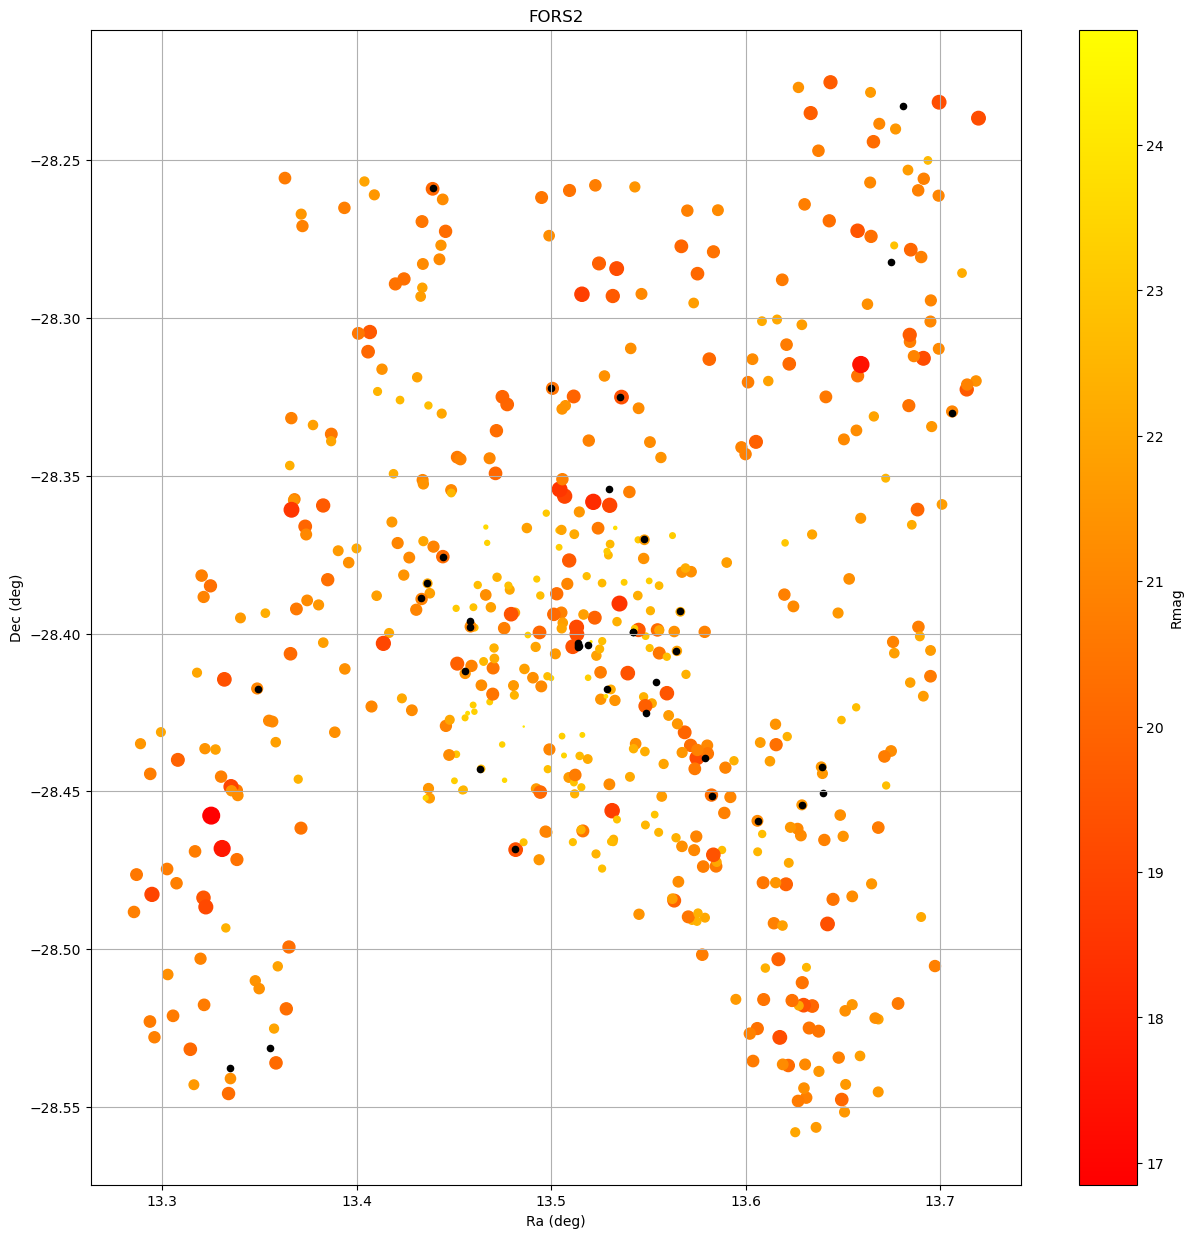

In [62]:
fig =plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
im = ax.scatter(df_f2.ra, df_f2.dec,c=df_f2.Rmag,cmap="autumn",s=siz_f2)
im2 = ax.scatter(df_f2_rem.ra, df_f2_rem.dec,c="k",s=20)
cbar = plt.colorbar(im)
cbar.set_label('Rmag')
ax.grid()
ax.set_xlabel("Ra (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("FORS2")

In [63]:
result_ptable.head()

ID         KIDS_TILE    RAJ2000   DECJ2000   
0  KiDSDR4 J005347.585-283857.70   KIDS_13.5_-28.2   13.448272 -28.649362  \
1  KiDSDR4 J005311.072-283857.09   KIDS_13.5_-28.2   13.296137 -28.649193   
2  KiDSDR4 J005325.757-283857.40   KIDS_13.5_-28.2   13.357325 -28.649280   
3  KiDSDR4 J005304.514-283856.87   KIDS_13.5_-28.2   13.268810 -28.649131   
4  KiDSDR4 J005450.518-283856.99   KIDS_13.5_-28.2   13.710493 -28.649166   

   FLUX_RADIUS  CLASS_STAR  MAG_GAAP_u  MAG_GAAP_g  MAG_GAAP_r  MAG_GAAP_i   
0     3.074759    0.087846         NaN   24.149288   23.768167   23.232088  \
1     2.204050    0.024639         NaN   24.984371   23.894615   23.560923   
2     1.996444    0.453629         NaN   24.543087   24.572063   24.403250   
3     3.169912    0.644952   24.936752   23.930965   24.052298   23.712200   
4     2.547129    0.086659   24.941830   24.455513   23.566183   23.421646   

   ...  FLUX_GAAP_H  FLUXERR_GAAP_H  FLUX_GAAP_Ks  FLUXERR_GAAP_Ks   Z_B   
0  ...  1902.138916      560.302429   1115.554688       714.054138  0.69  \
1  ...   487.254028      515.479370   1039.011230       583.662354  0.52   
2  ...   595.352112      501.924835     60.217583       614.736572  1.61   
3  ...   926.180481      506.579468           NaN              NaN  1.89   
4  ...   578.094238      486.451935   2184.439209       502.354218  0.28   

   Z_ML  EXTINCTION_u  EXTINCTION_g  EXTINCTION_r  EXTINCTION_i  
0  2.82      0.067433      0.052544      0.036350      0.027012  
1  0.19      0.066615      0.051906      0.035908      0.026684  
2  1.96      0.066055      0.051470      0.035607      0.026460  
3  2.54      0.066197      0.051580      0.035683      0.026516  
4  0.24      0.092741      0.072263      0.049991      0.037149  

[5 rows x 48 columns]

In [64]:
df_kids = result_ptable[['RAJ2000','DECJ2000',
                         'MAG_GAAP_u',
                        'MAG_GAAP_g',
                        'MAG_GAAP_r',
                        'MAG_GAAP_i',
                        'MAG_GAAP_Z',
                        'MAG_GAAP_Y',
                        'MAG_GAAP_J',
                        'MAG_GAAP_H',
                        'MAG_GAAP_Ks']]

In [65]:
siz_kids =  20*(24 - df_kids["MAG_GAAP_r"]).values

/home/joseph/anaconda3/envs/conda_photoZ/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


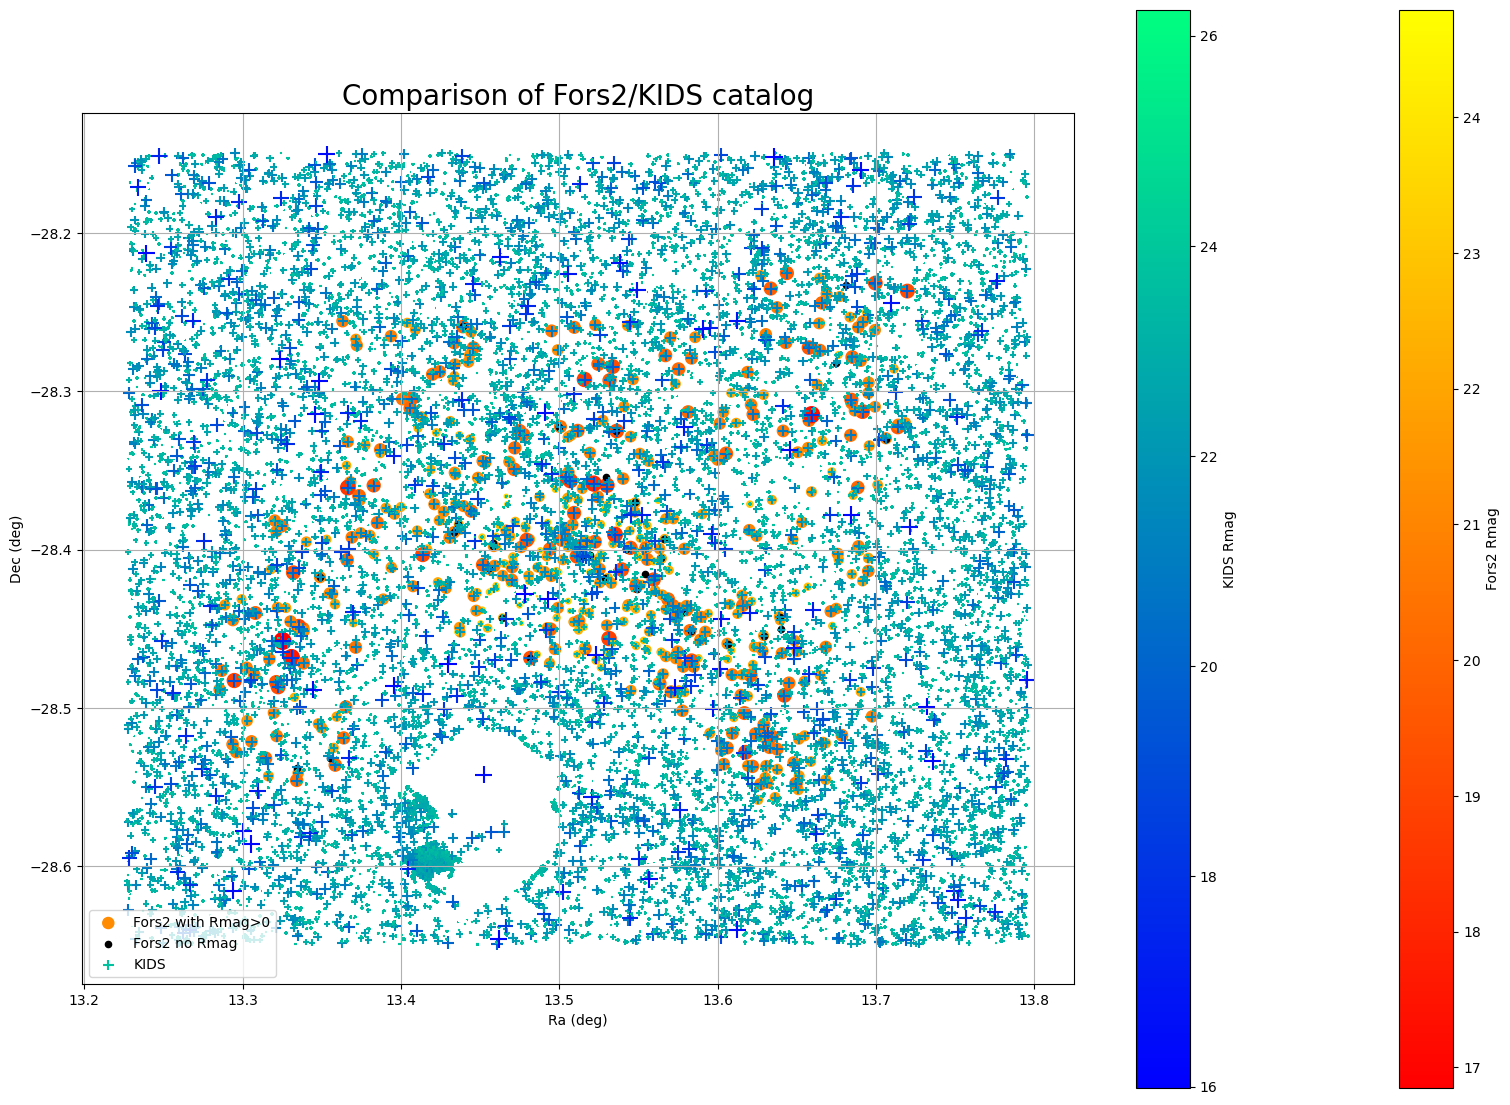

In [66]:
fig =plt.figure(figsize=(20,14))
ax=fig.add_subplot(111)
im = ax.scatter(df_f2.ra, df_f2.dec,c=df_f2.Rmag,cmap="autumn",s=siz_f2,label="Fors2 with Rmag>0")
im2 = ax.scatter(df_f2_rem.ra, df_f2_rem.dec,c="k",s=20,label="Fors2 no Rmag")
imk = ax.scatter(df_kids["RAJ2000"], df_kids["DECJ2000"],c=df_kids["MAG_GAAP_r"],marker="+",cmap="winter",s=siz_kids ,label="KIDS")

cbar = plt.colorbar(im)
cbar.set_label('Fors2 Rmag')
cbar2 = plt.colorbar(imk)
cbar2.set_label('KIDS Rmag')
ax.grid()
ax.legend()
ax.set_xlabel("Ra (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("Comparison of Fors2/KIDS catalog",fontsize=20)

for idx,row in df_f2.iterrows():
    x = row["ra"]
    y = row["dec"]
    num = int(row["num"])
    dy = 0
    dx = 0
            
    #ax.text(x+dx,y+dy,str(num),fontsize=5)


plt.gca().set_aspect('equal')

In [67]:
ra_slices = [13.2,13.3,13.4,13.5,13.6,13.7,13.8]
dec_slices = [-28.6,-28.5,-28.4,-28.3,-28.2]

NRA = len(ra_slices)-1
NDEC = len(dec_slices)-1

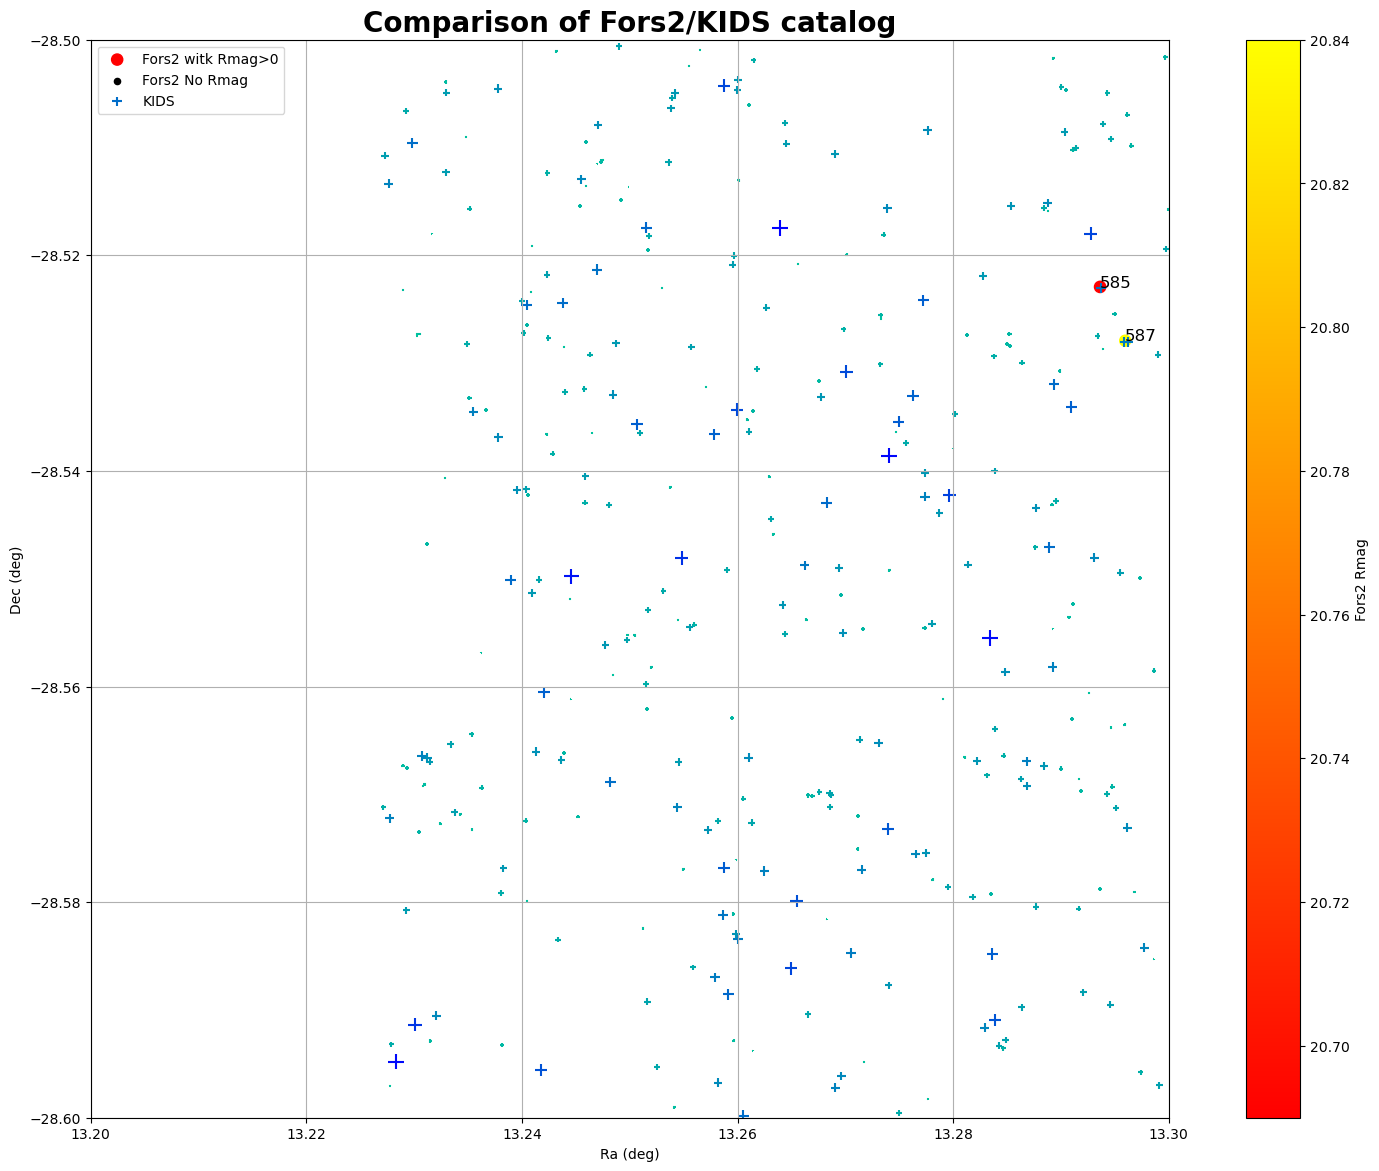

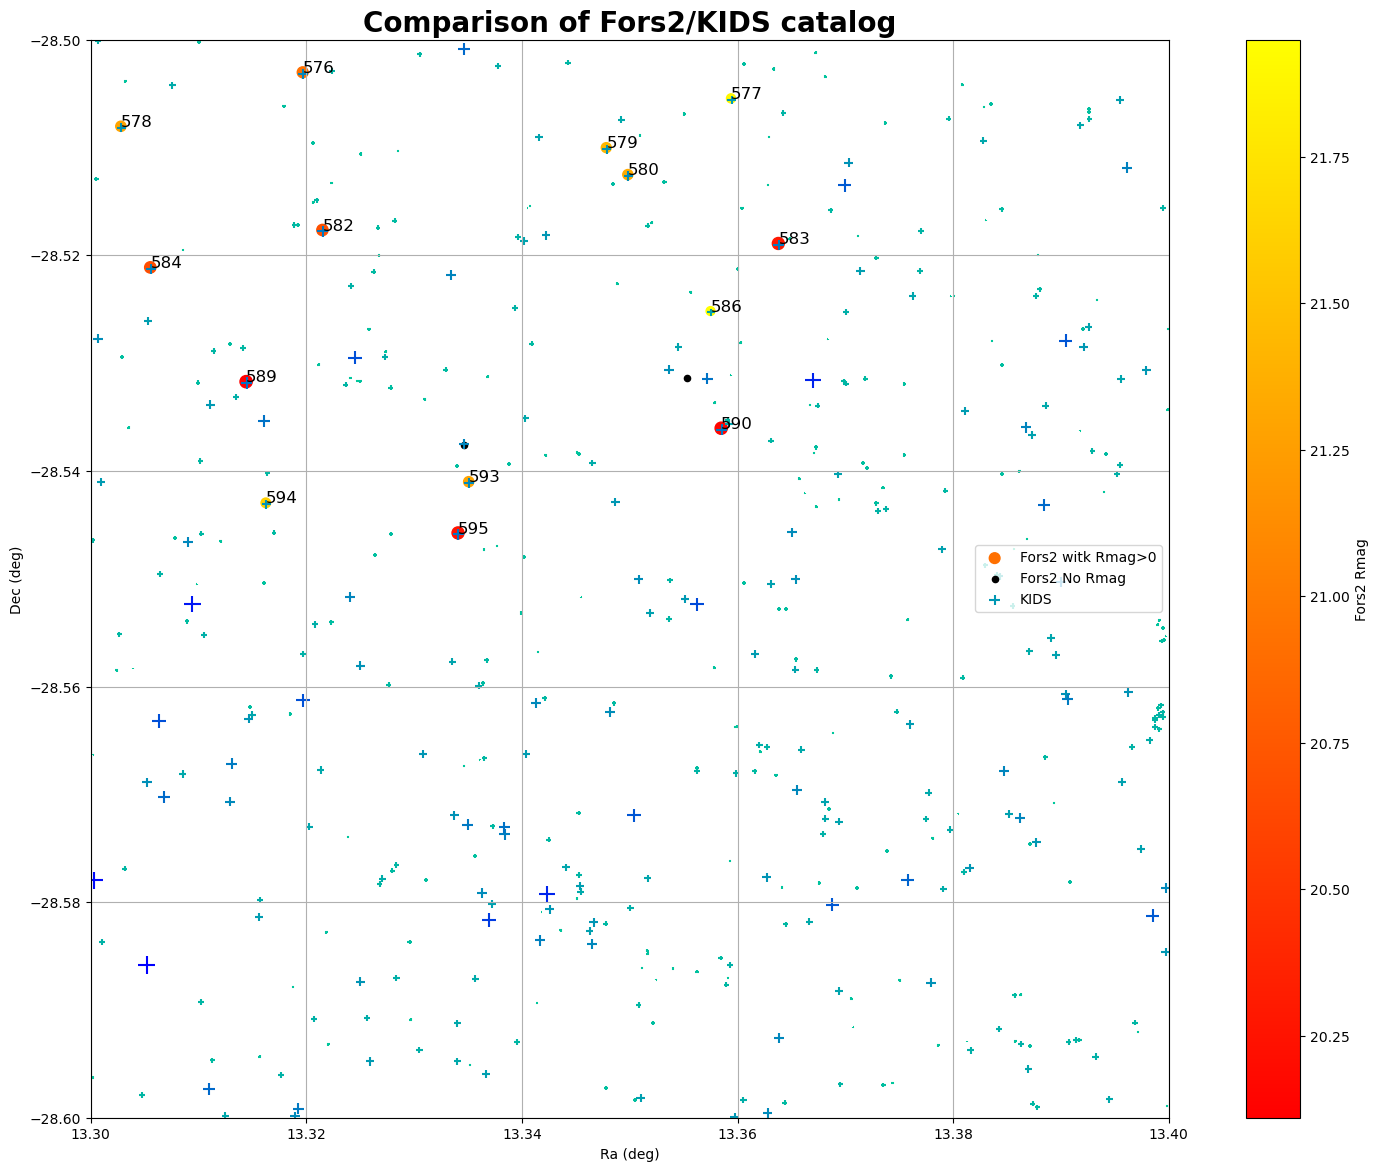

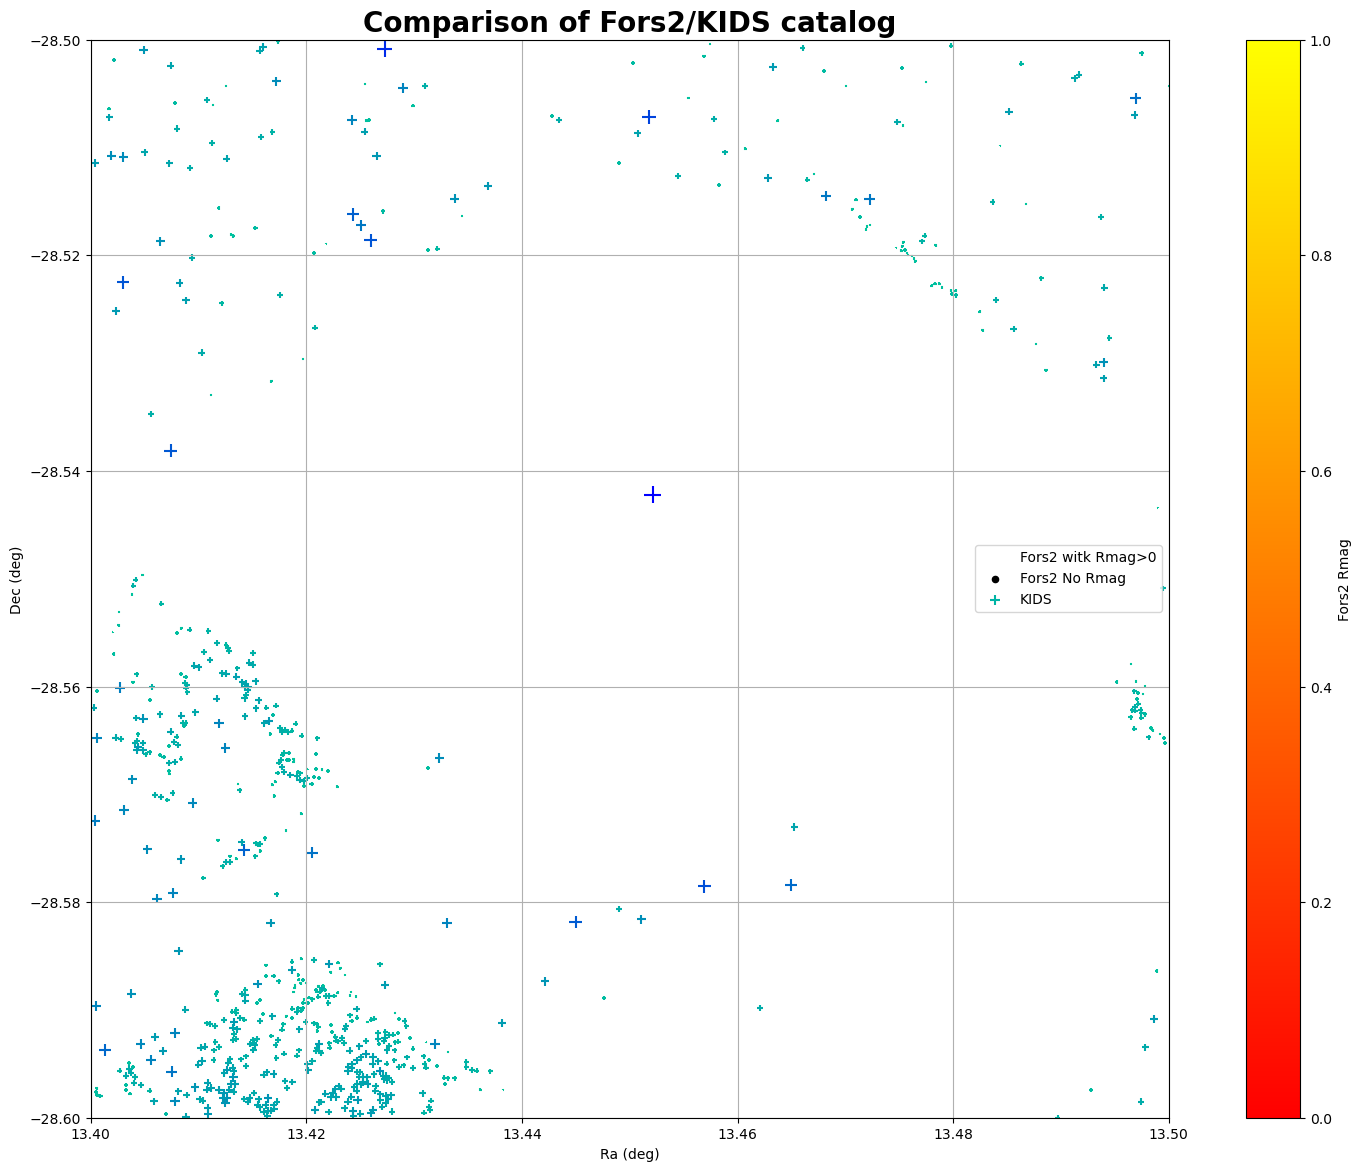

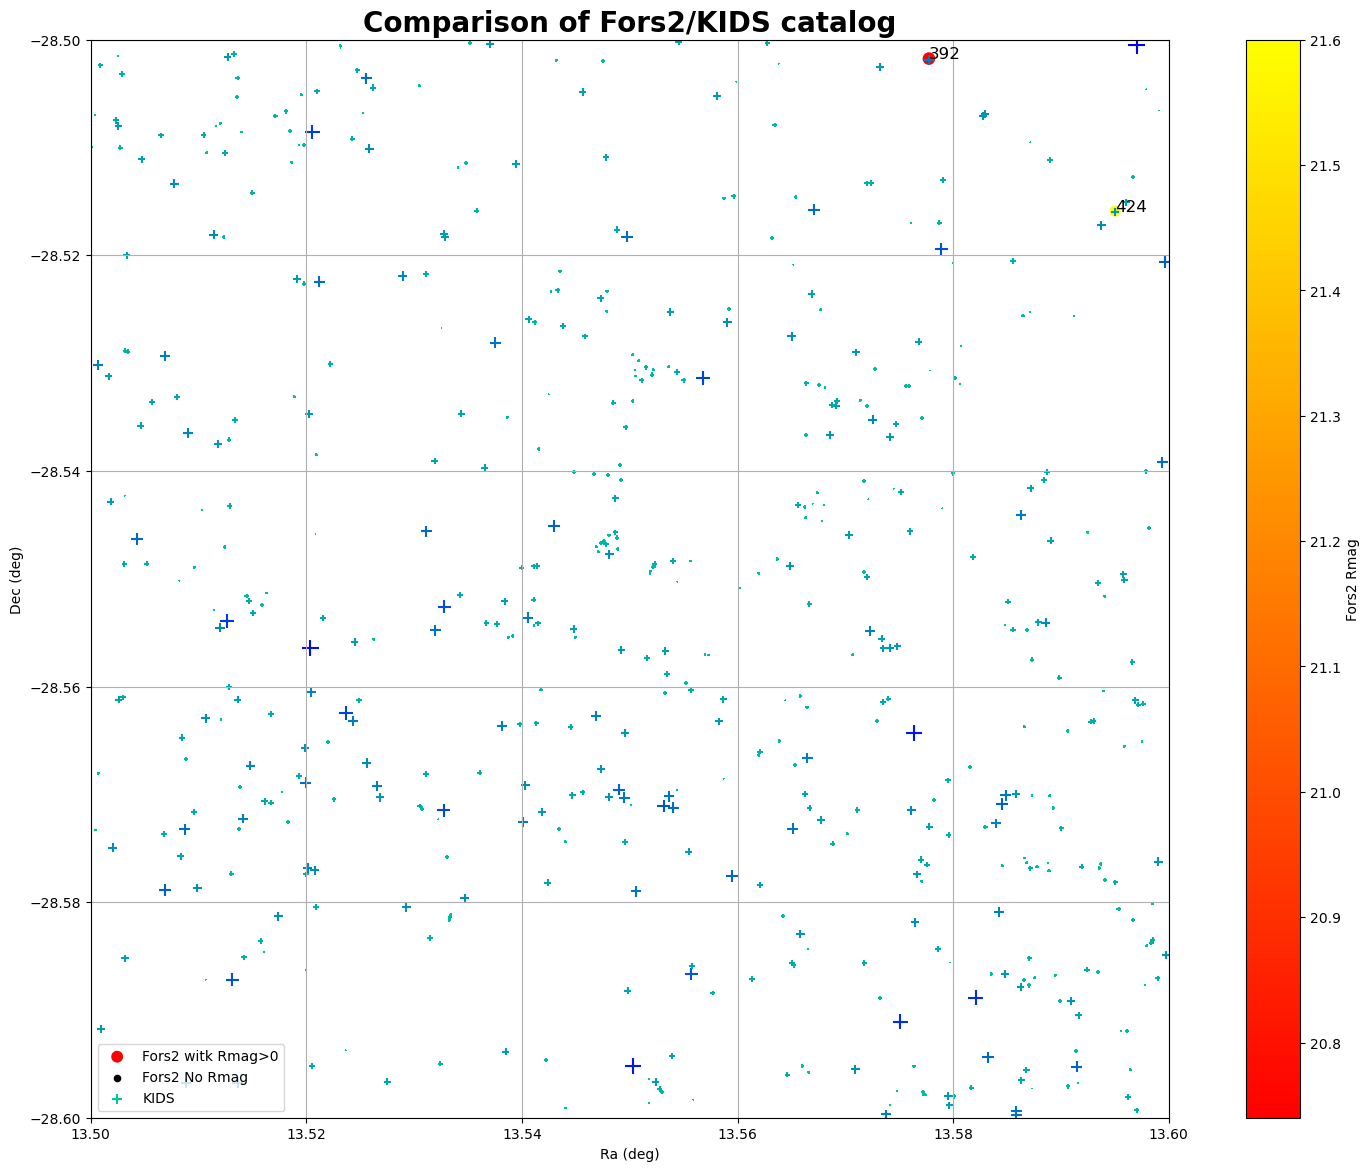

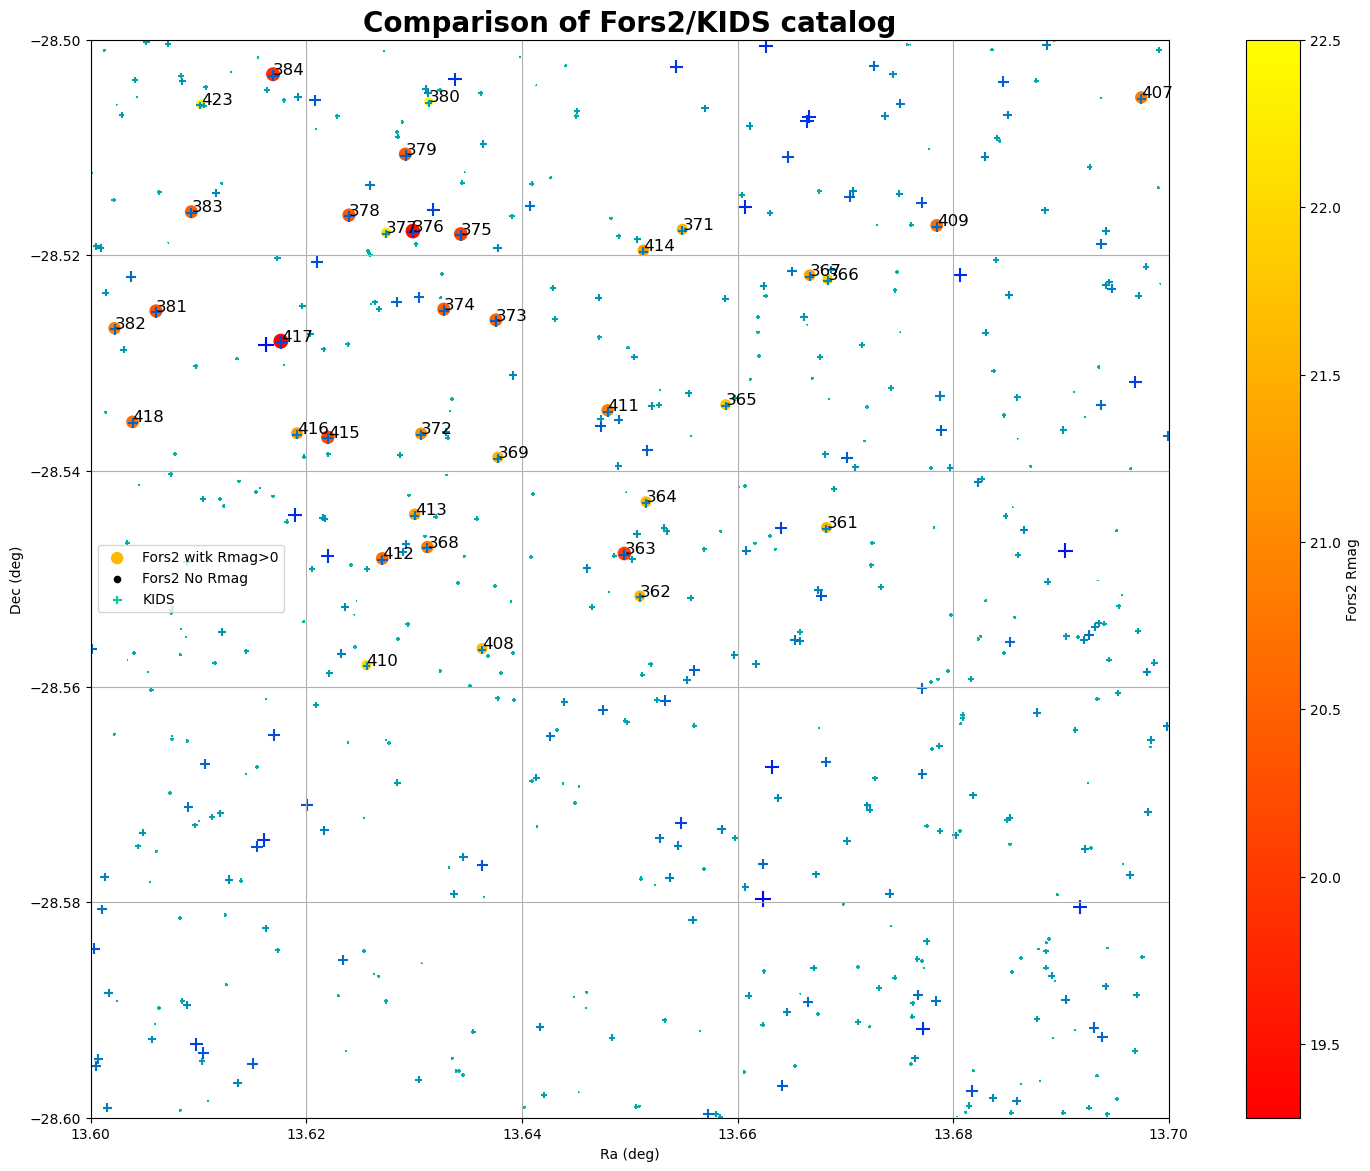

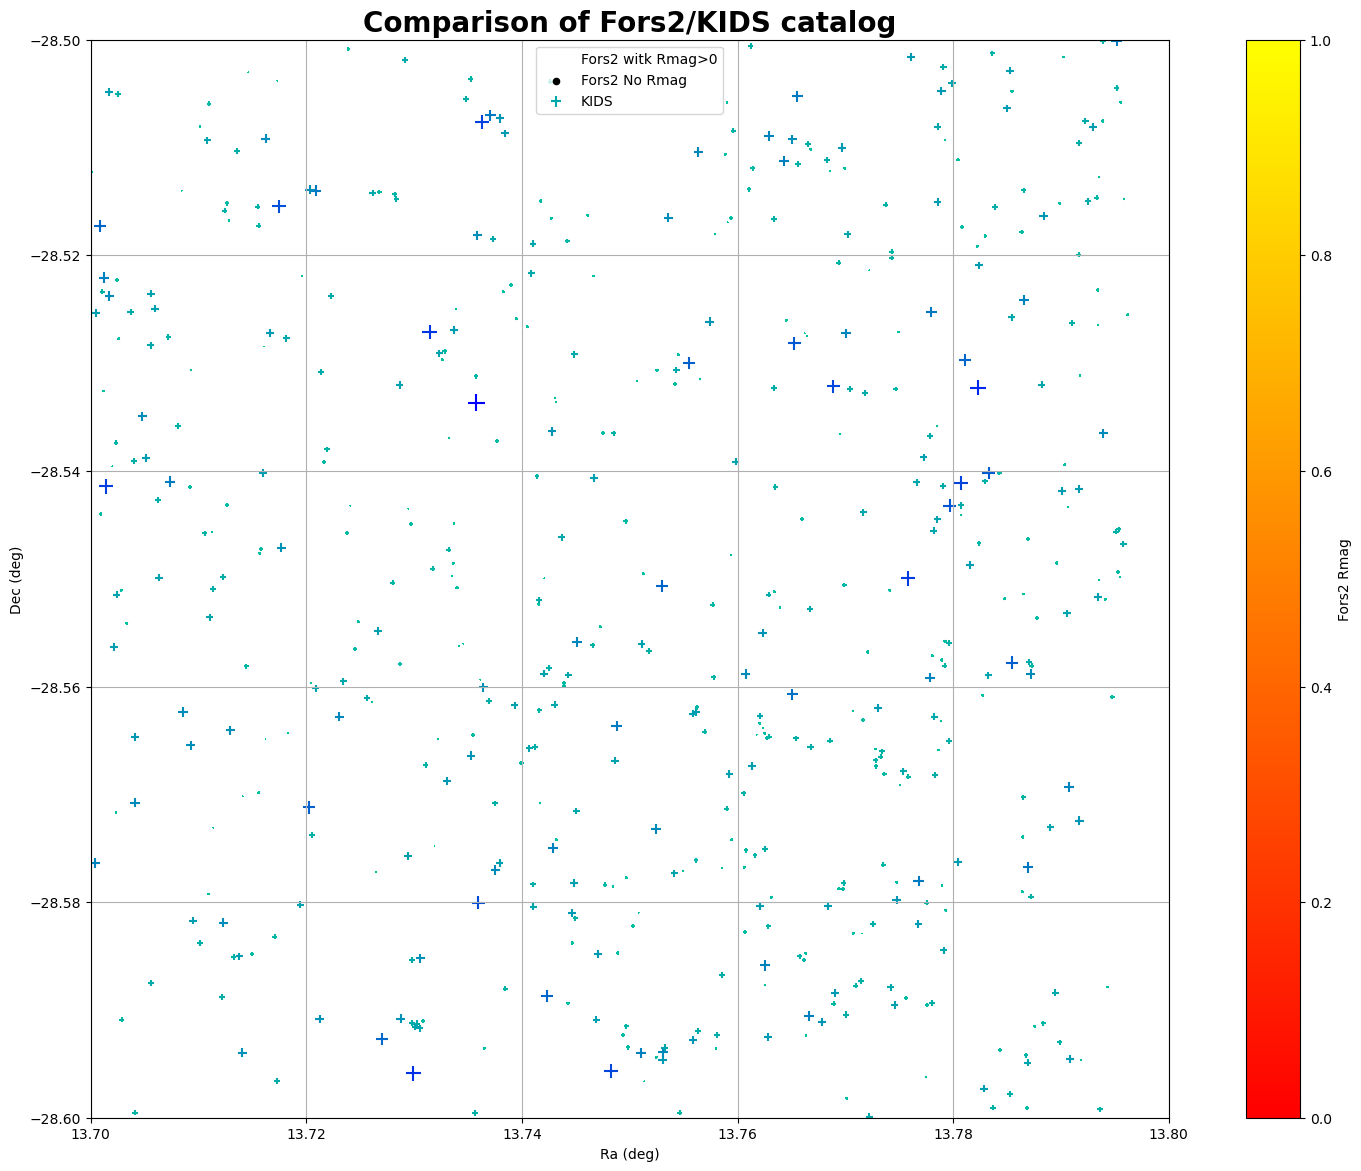

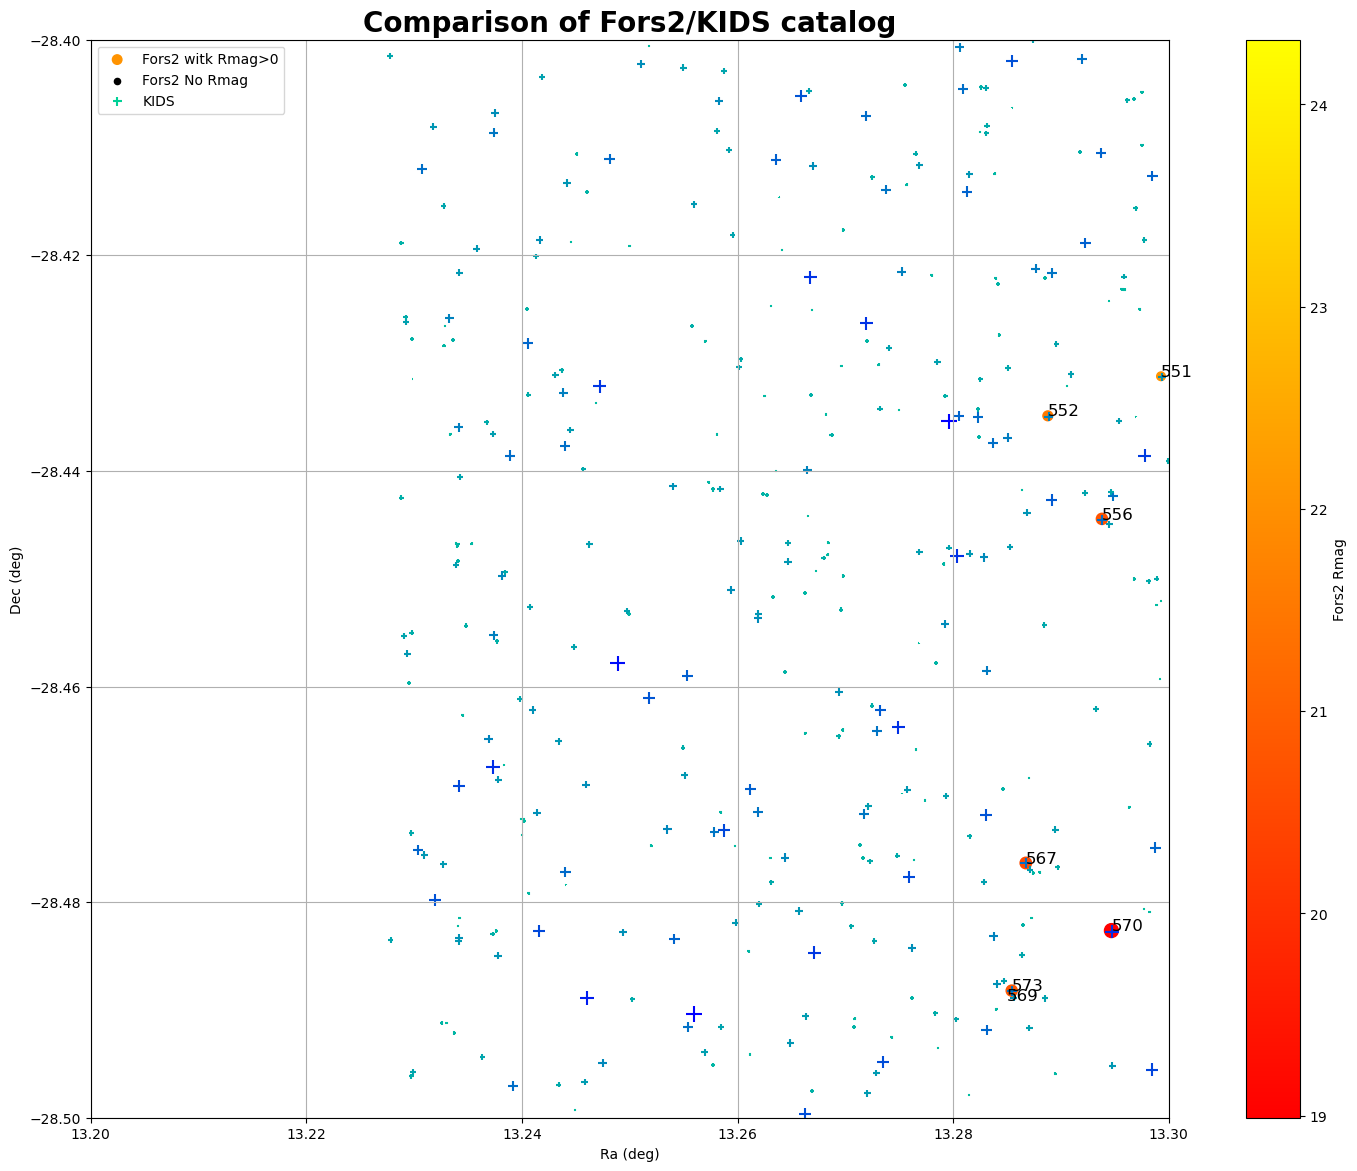

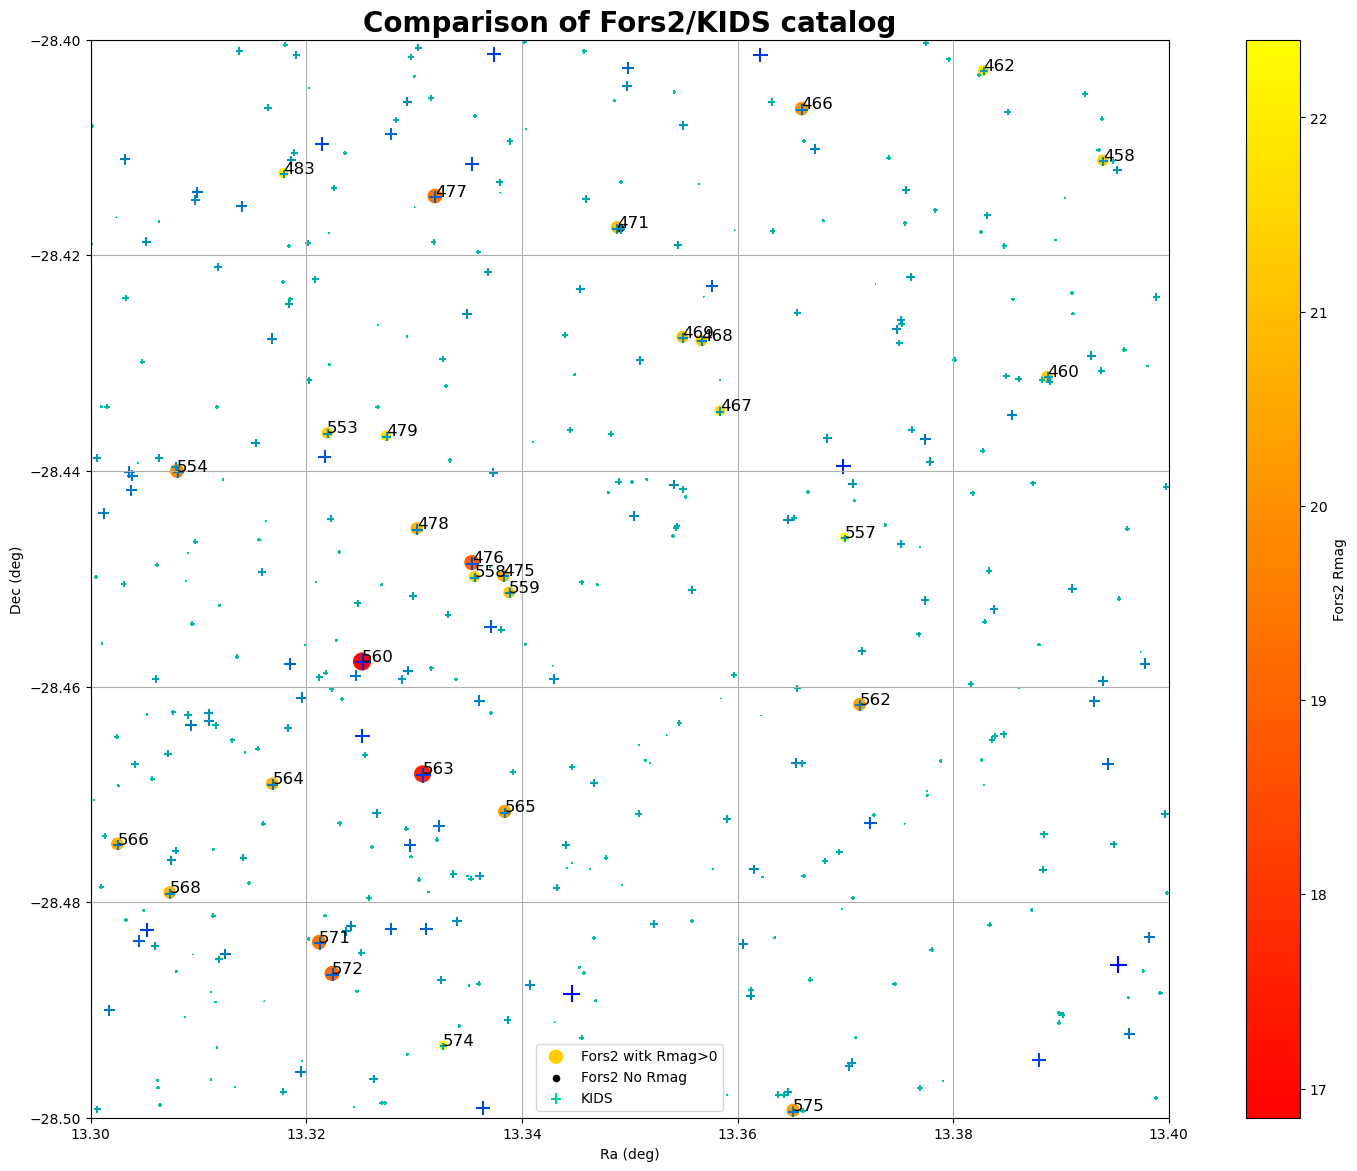

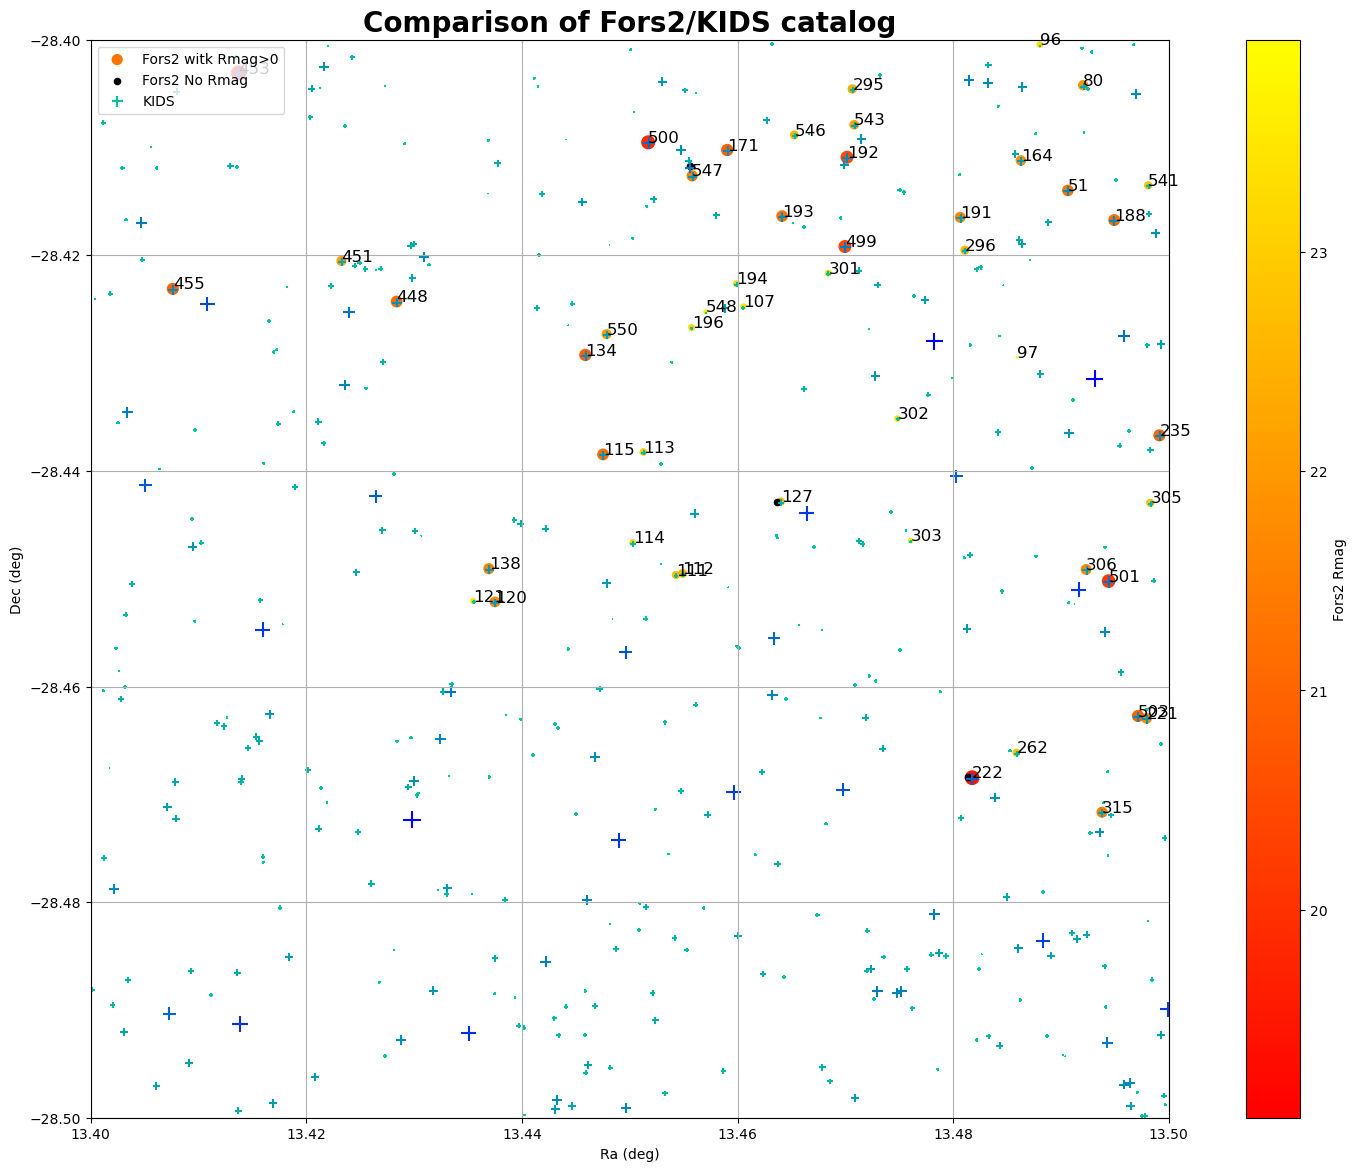

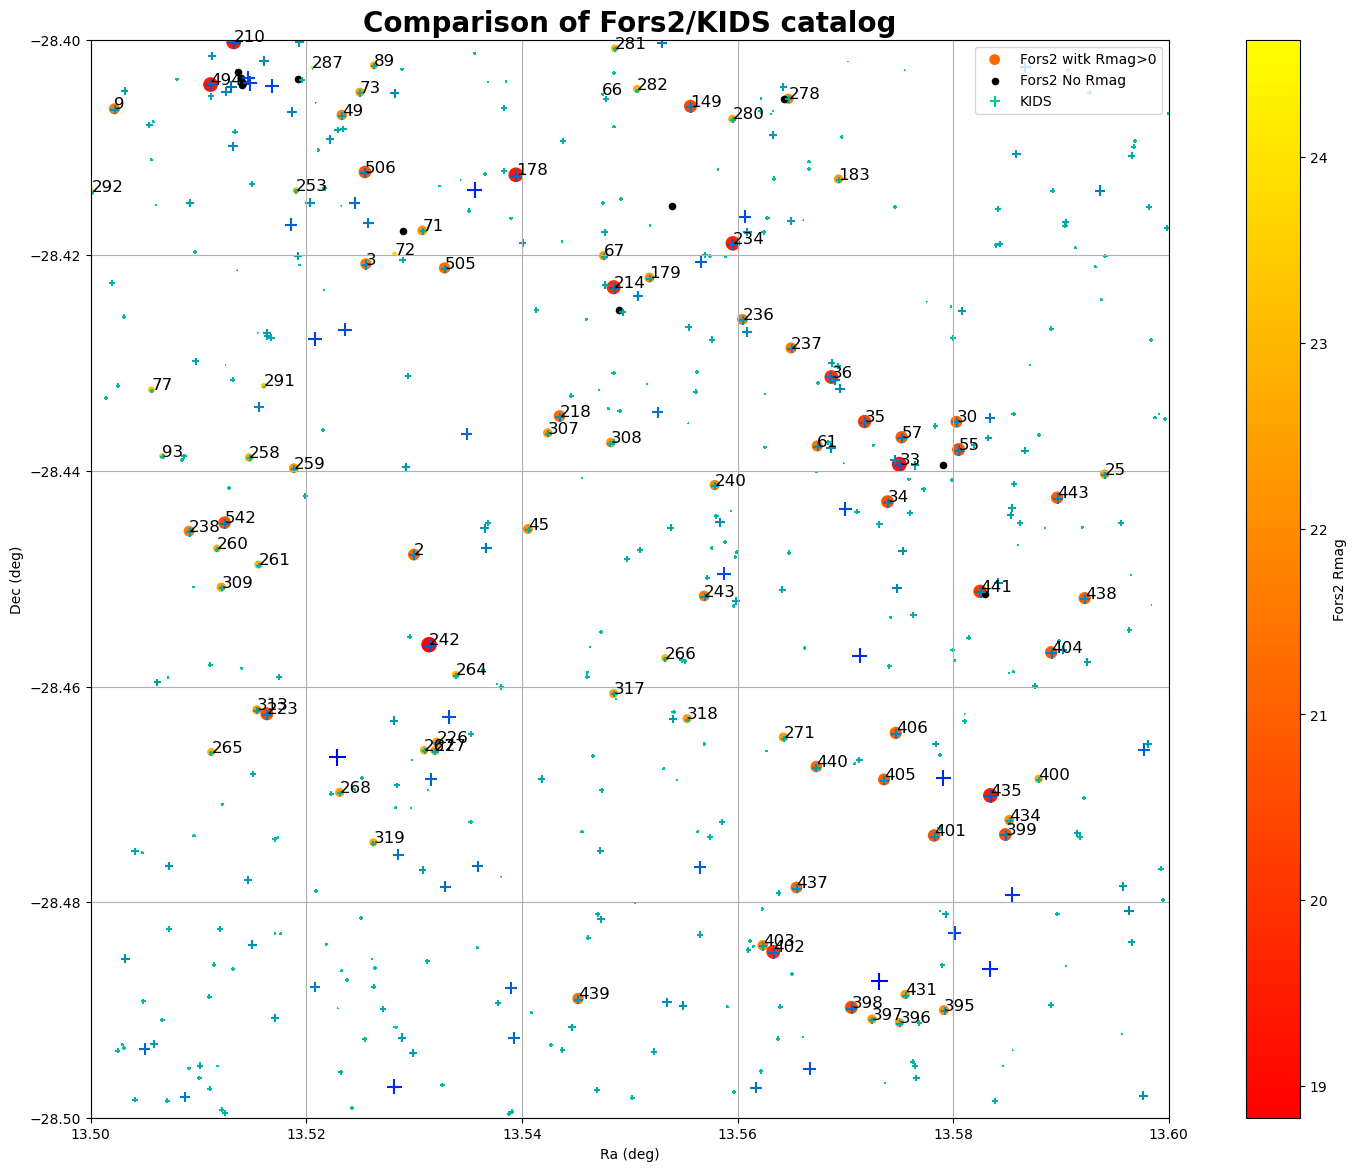

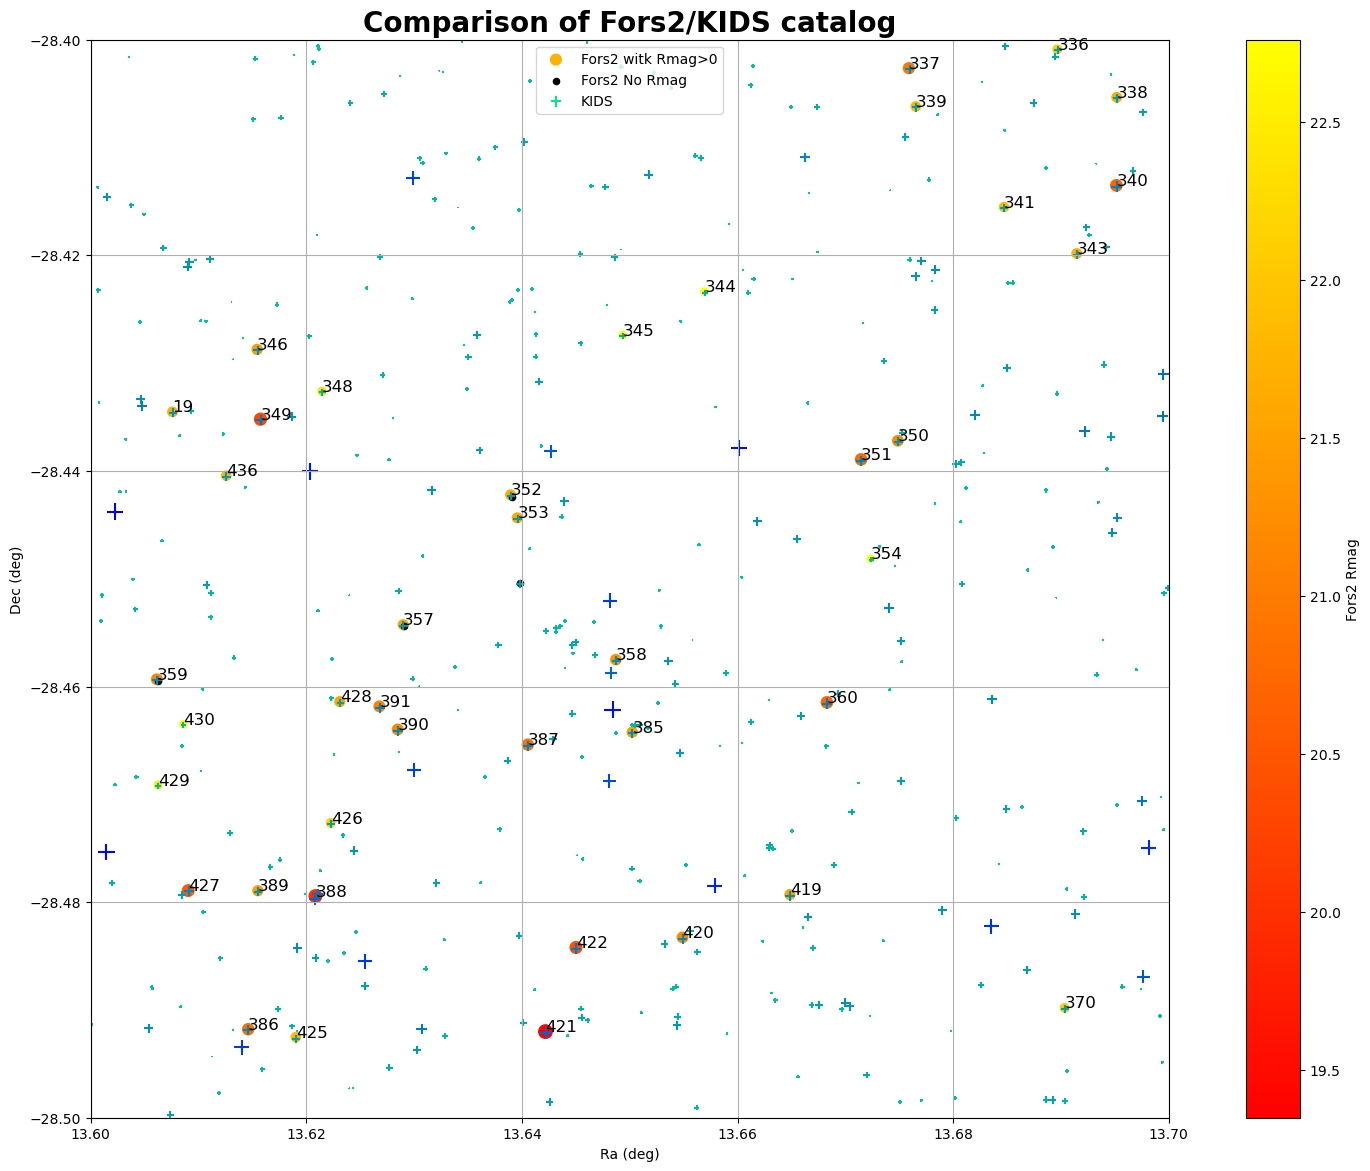

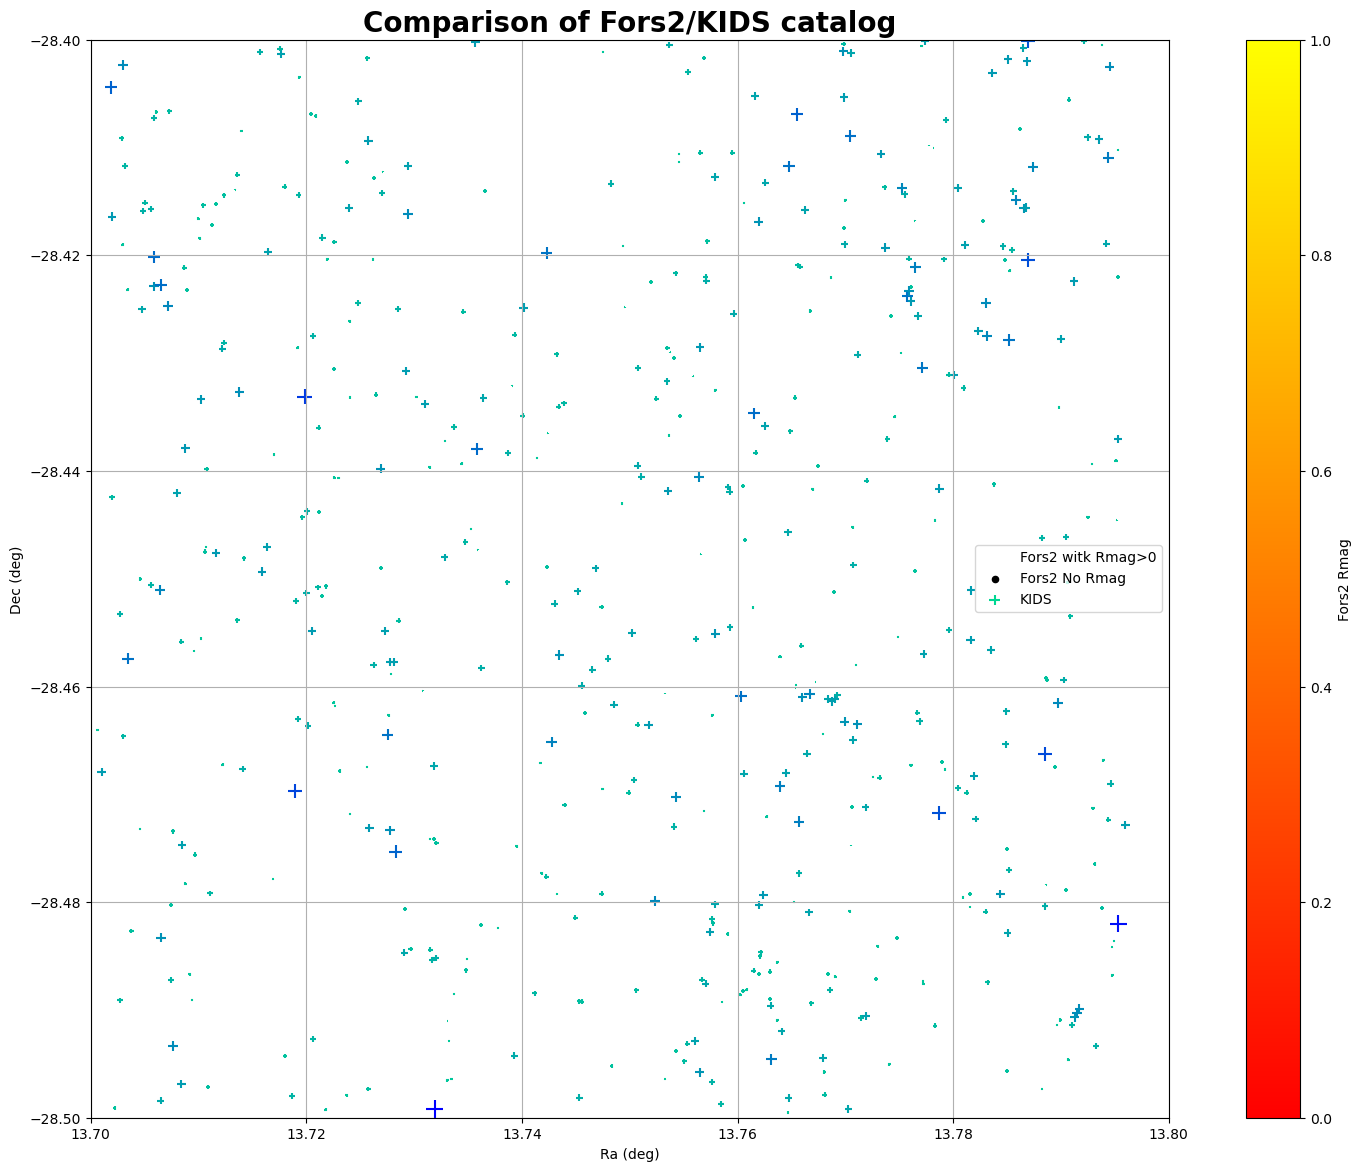

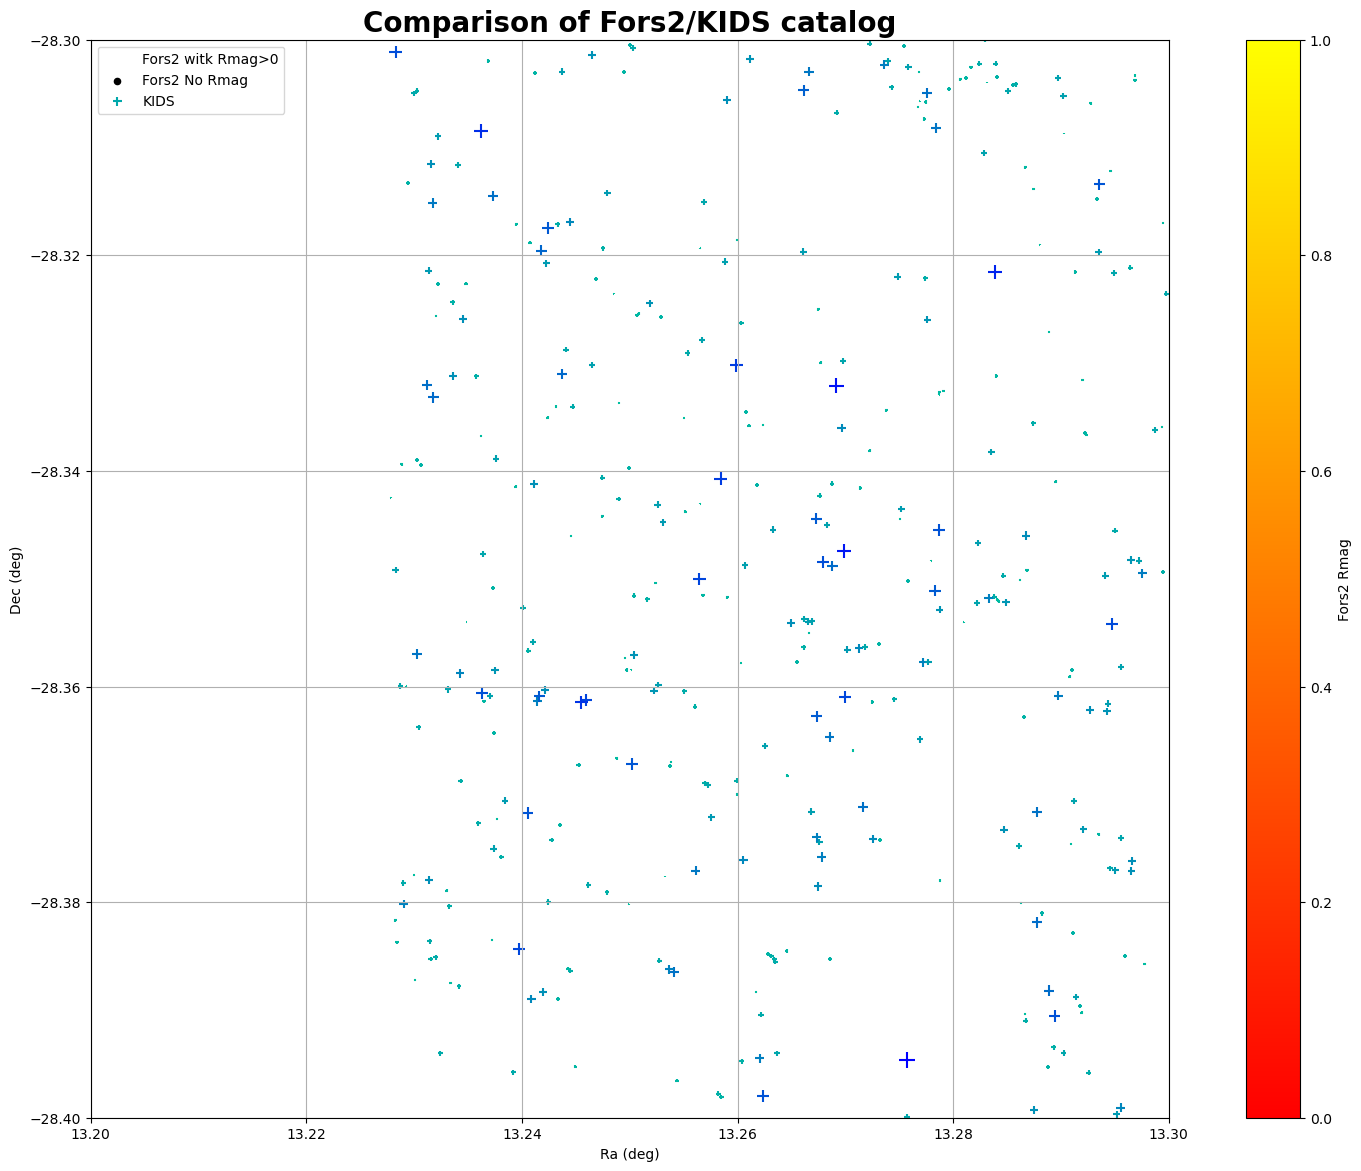

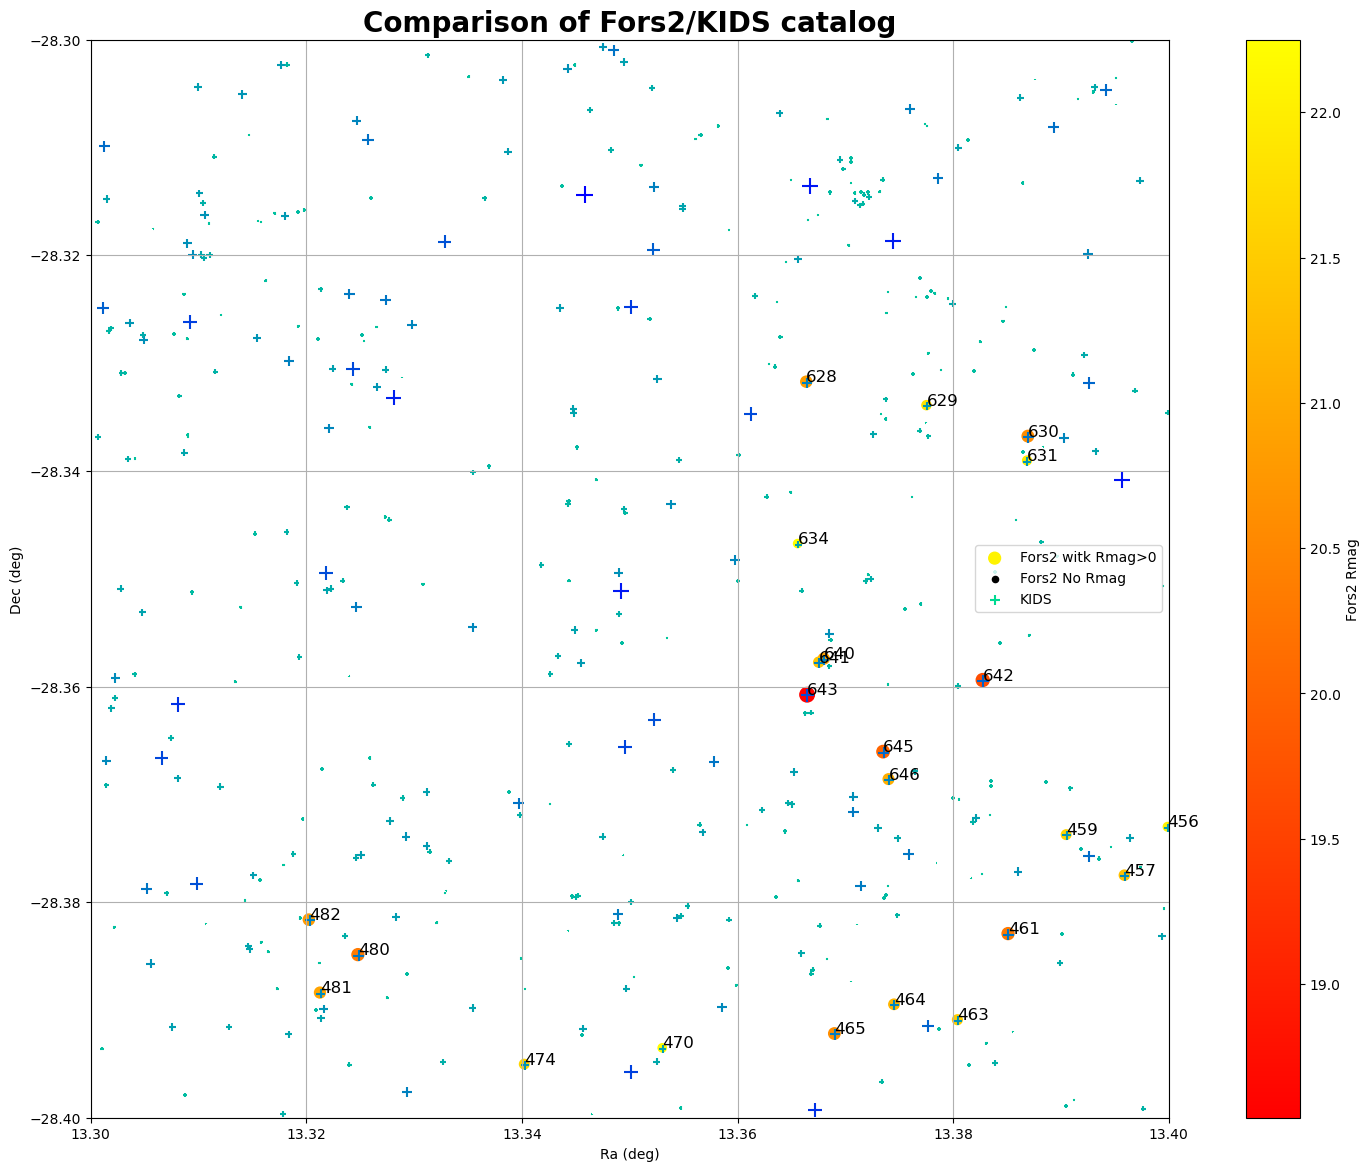

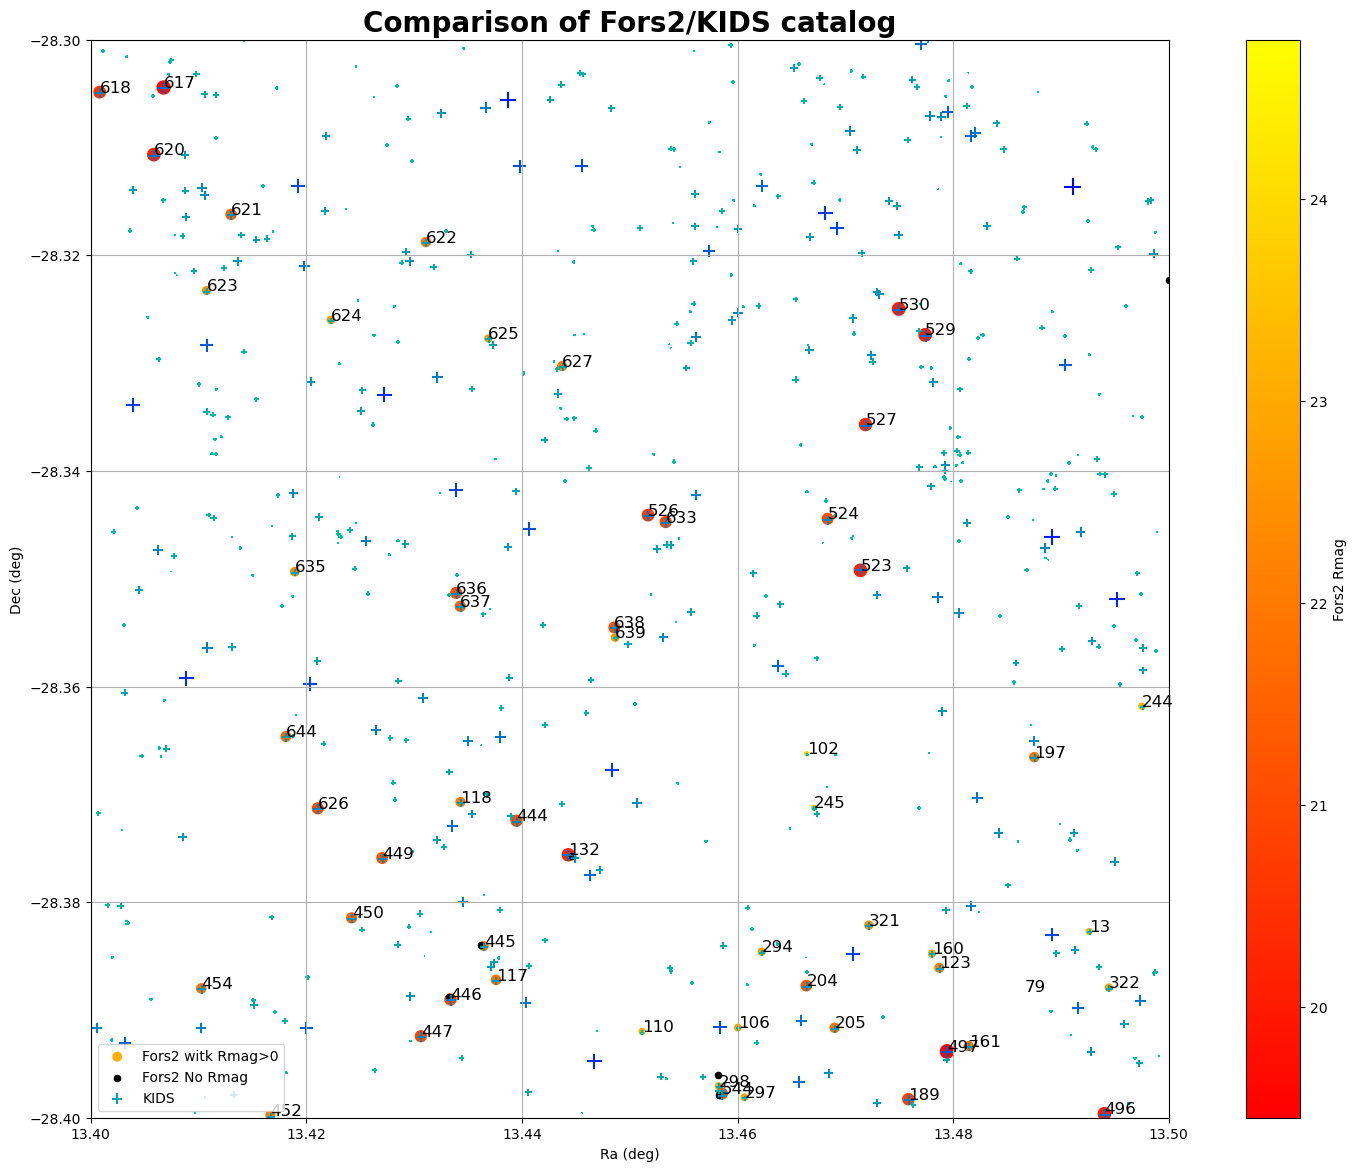

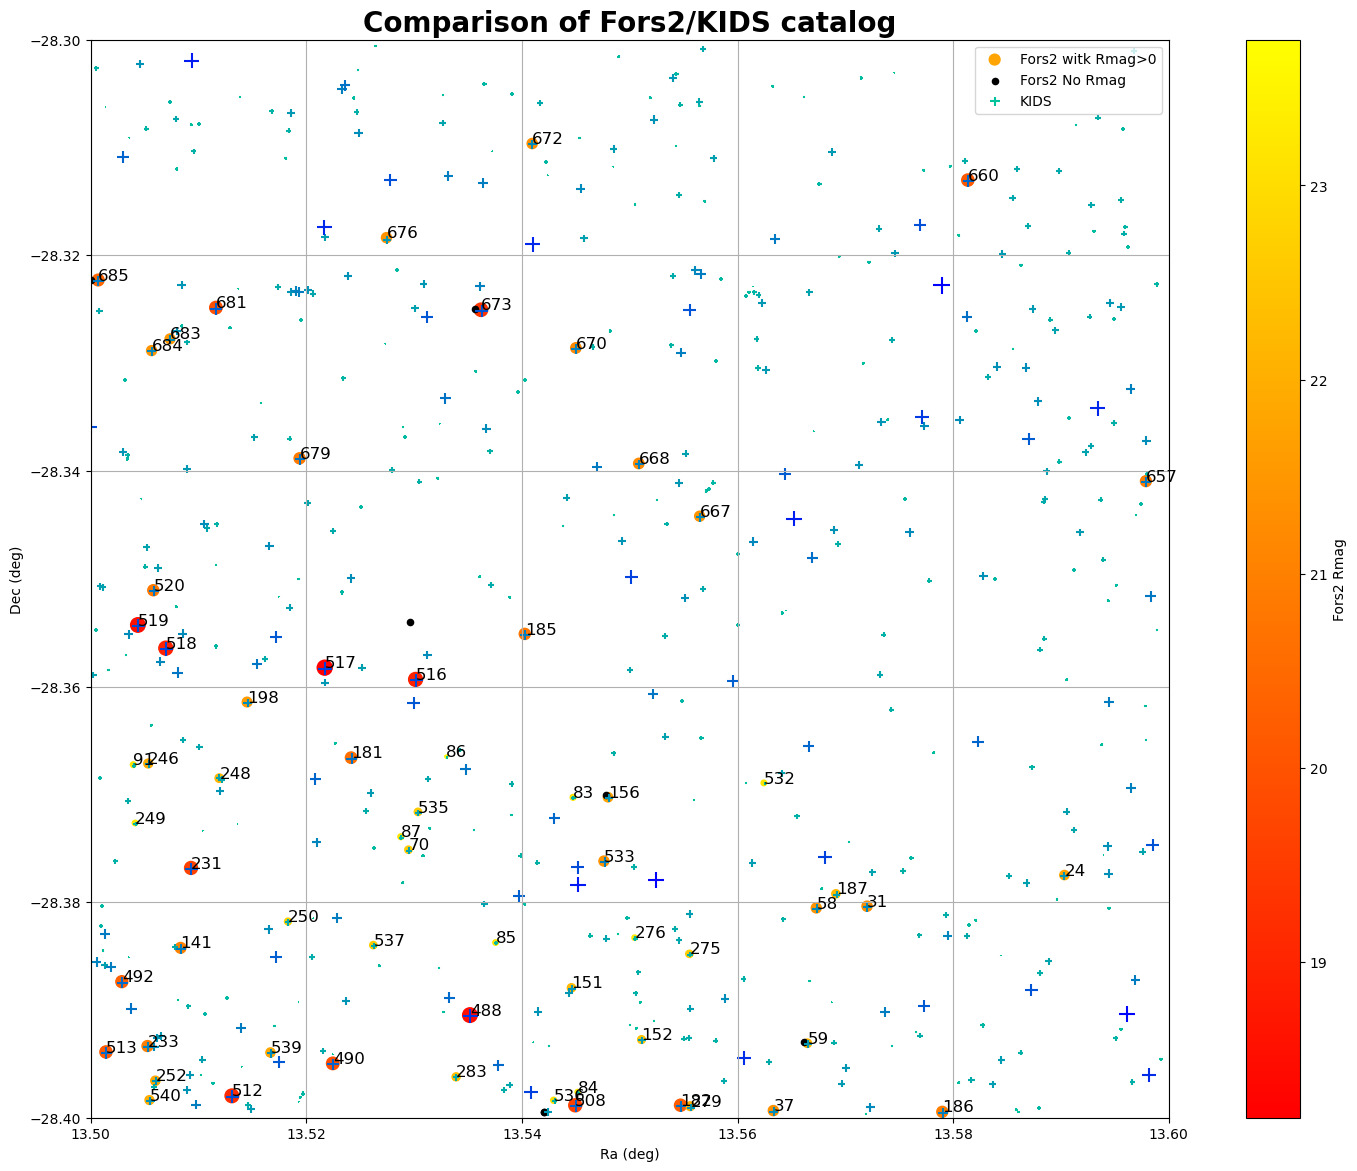

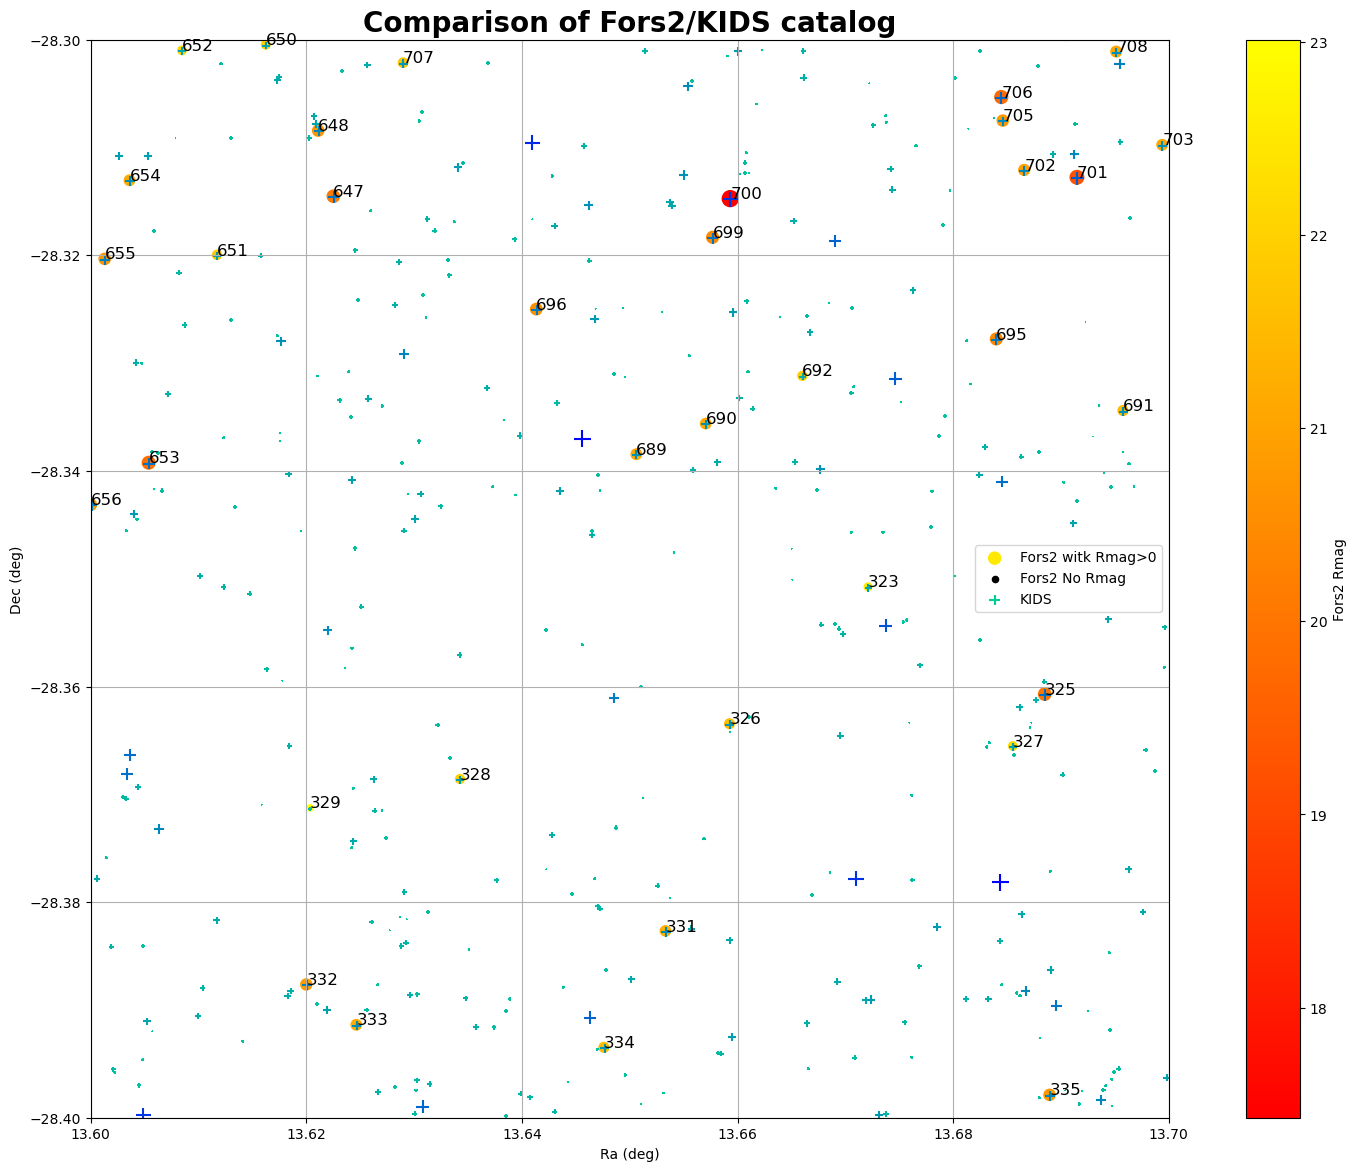

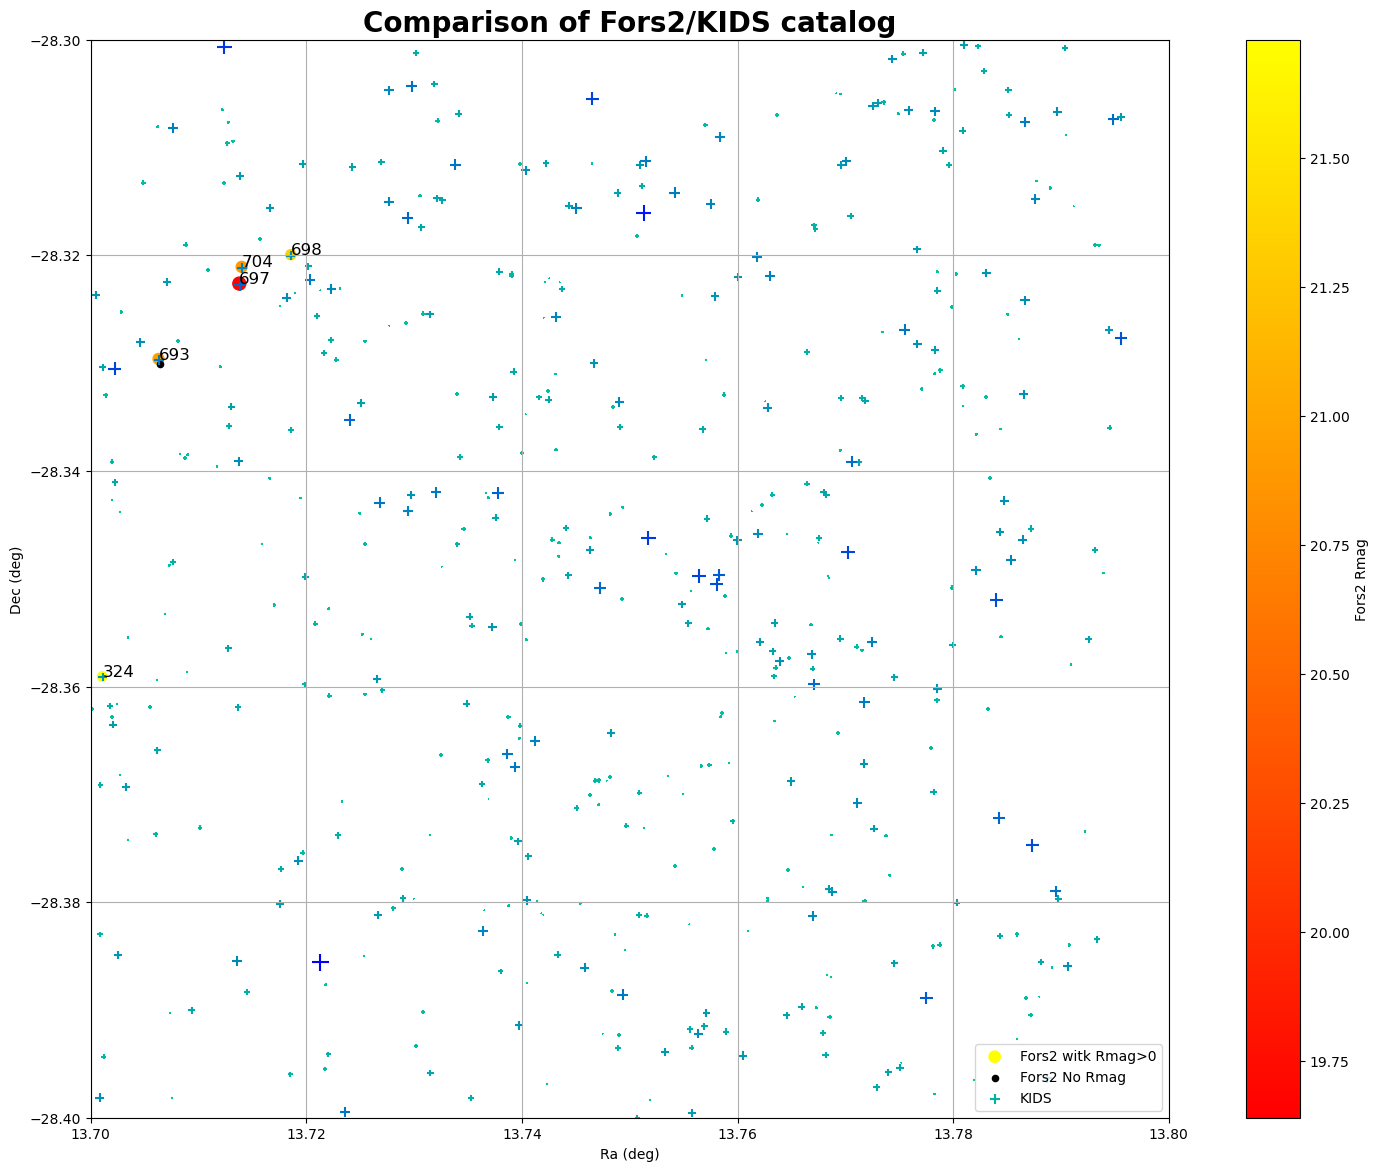

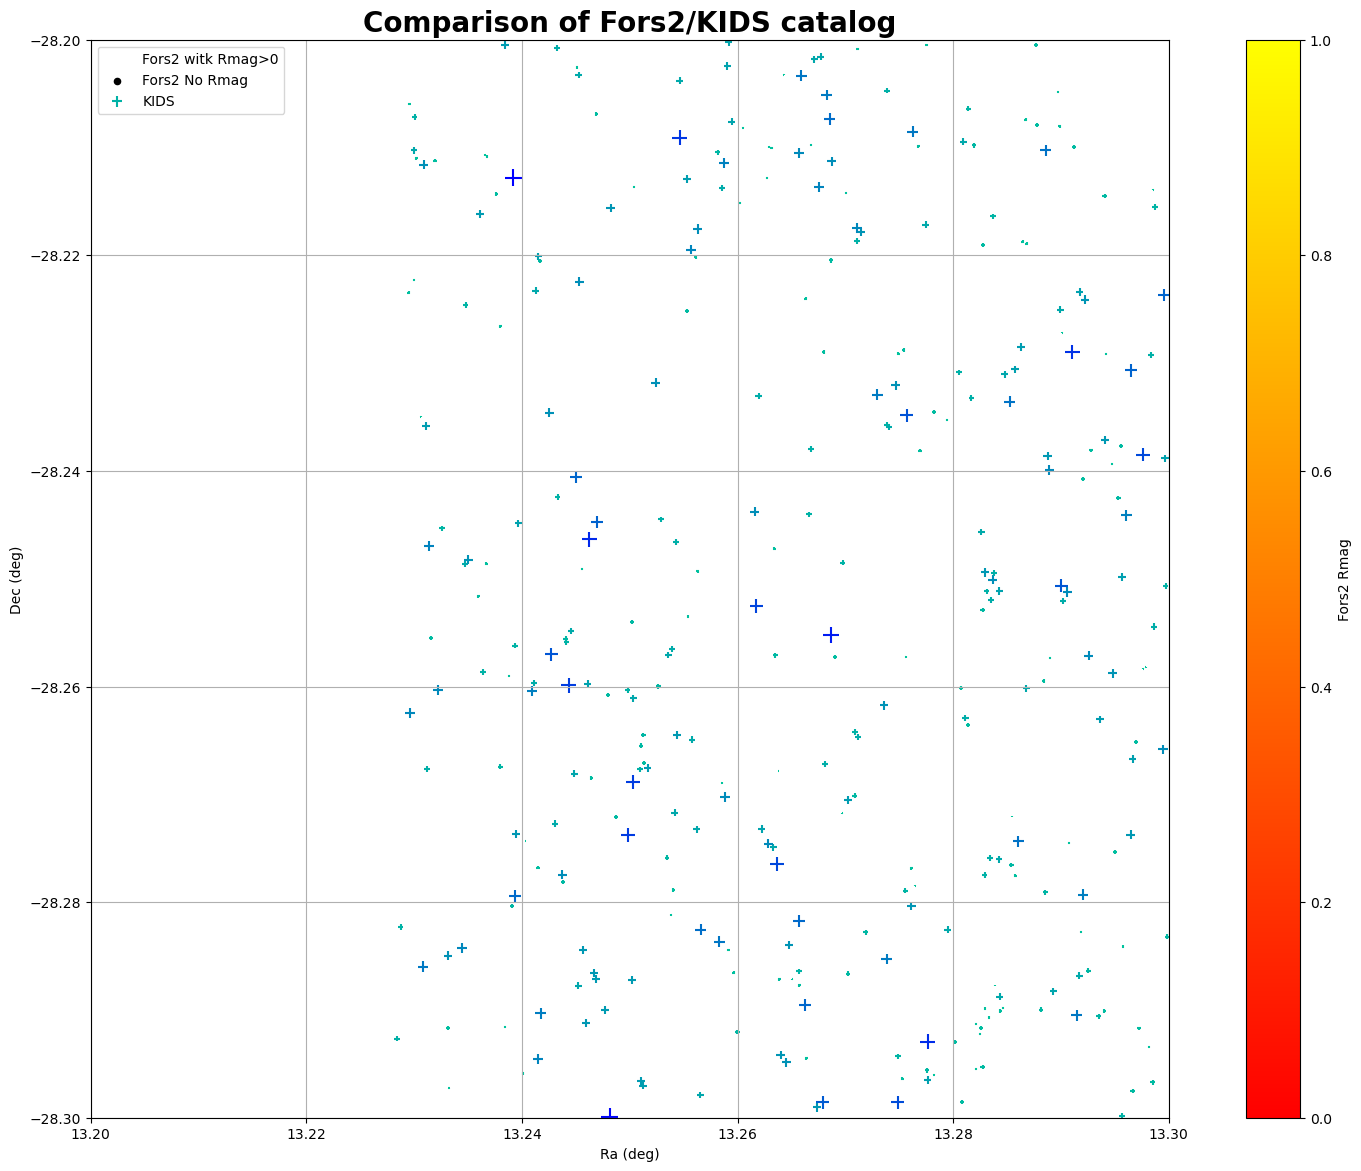

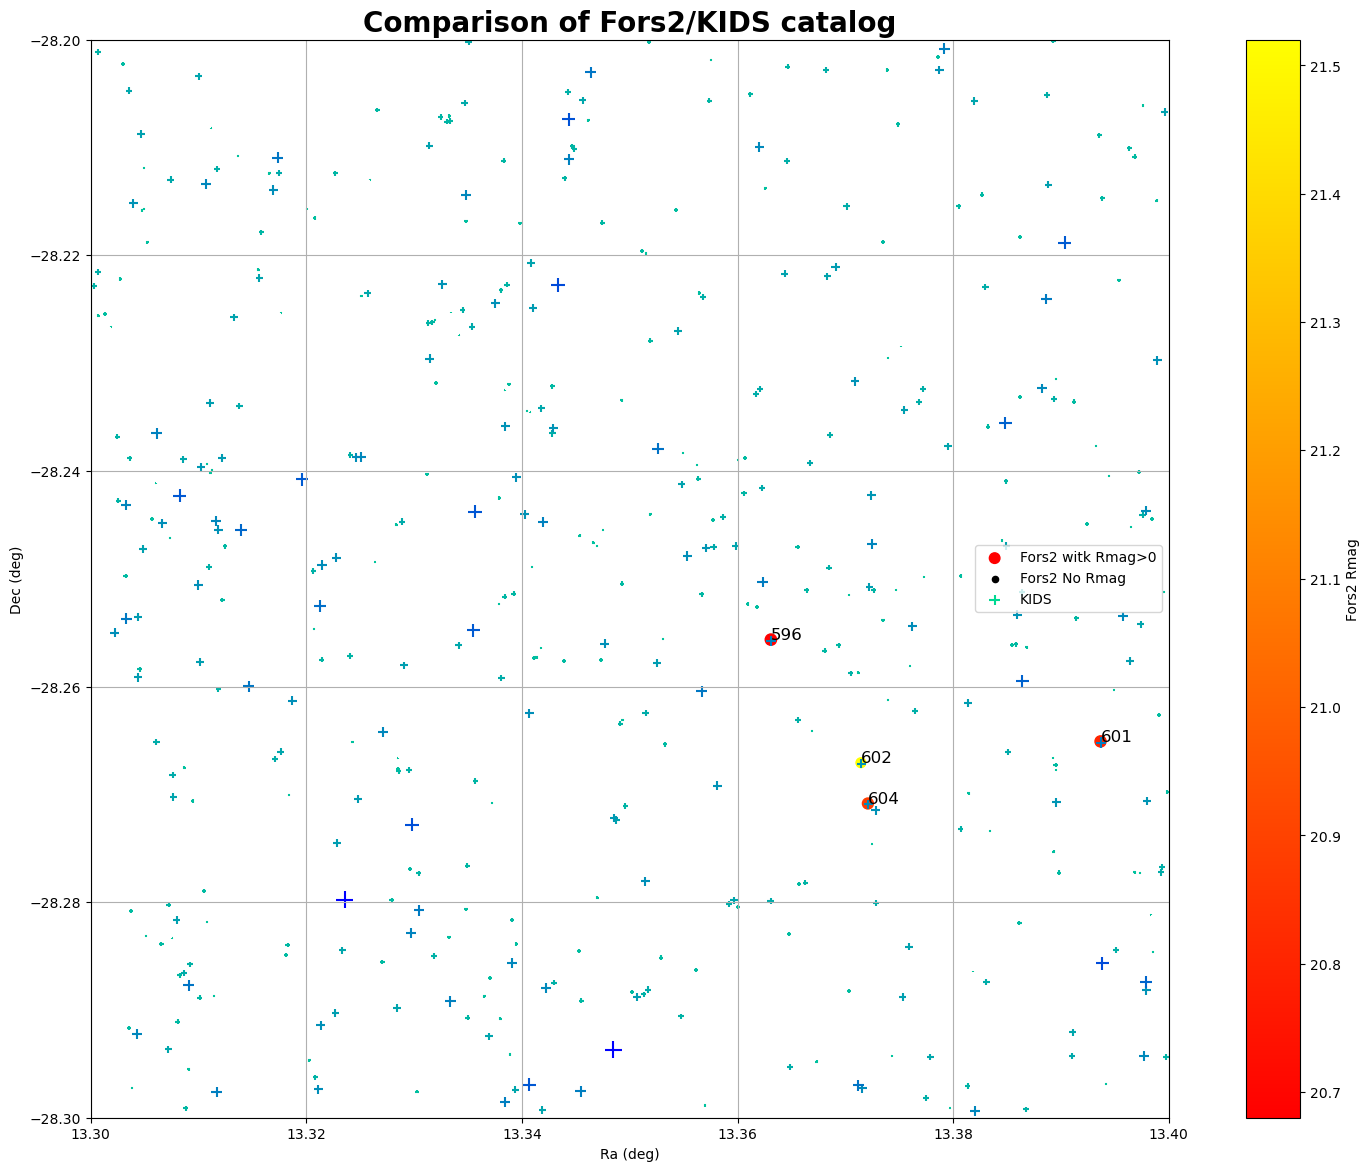

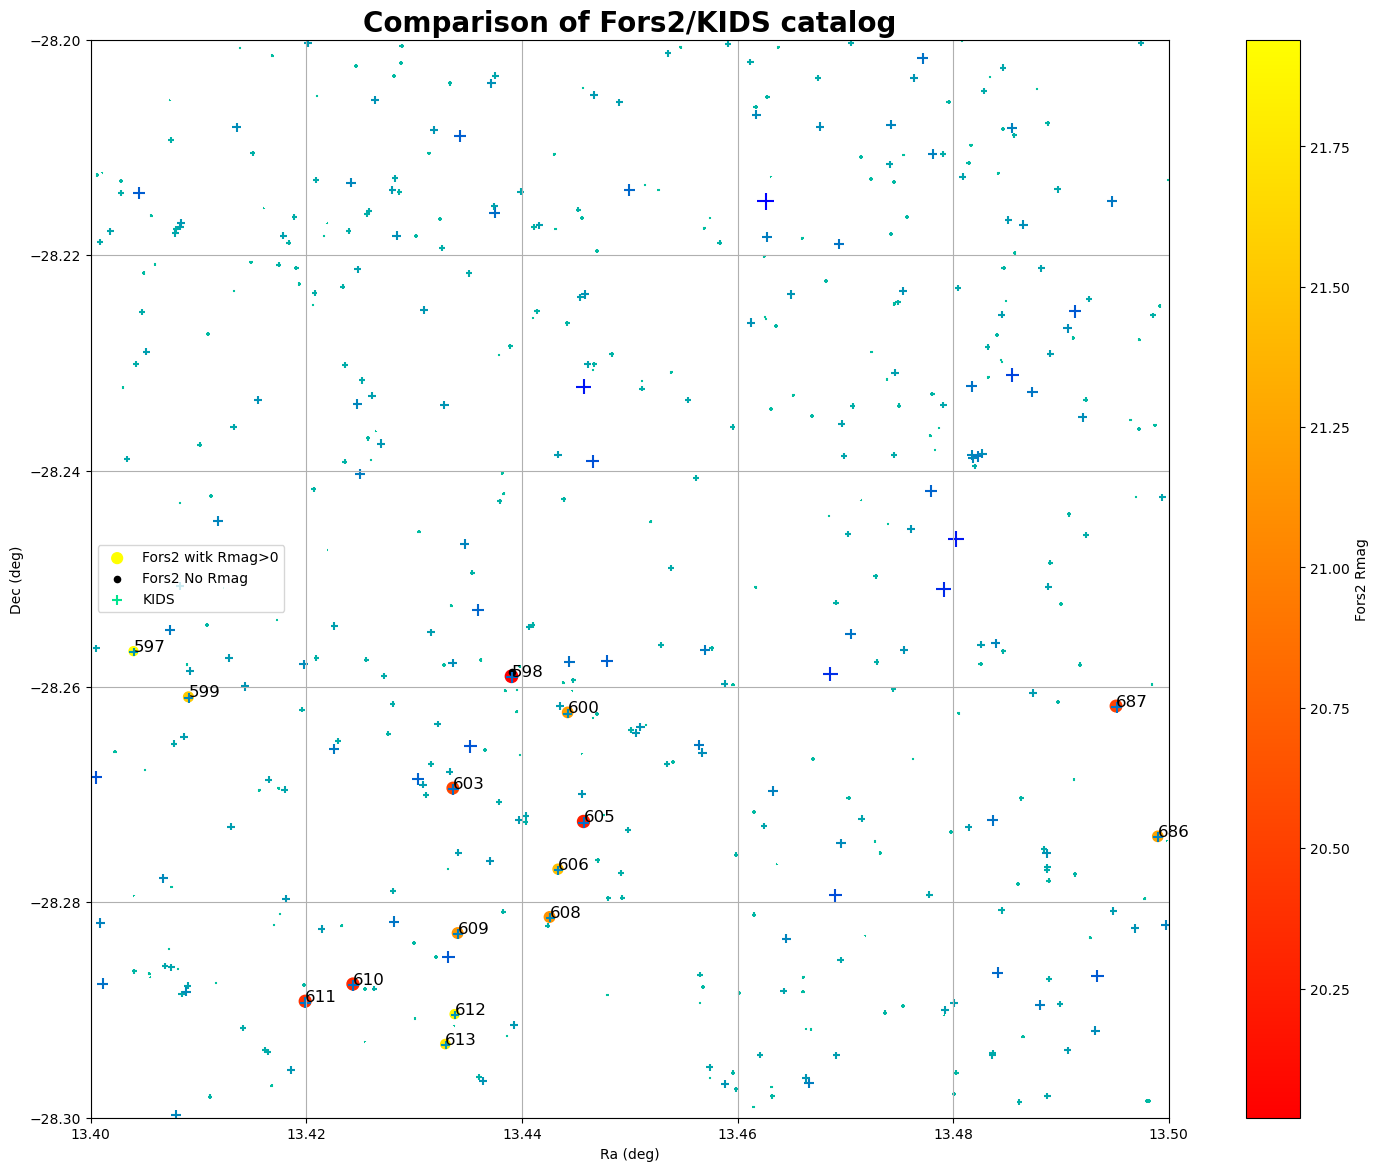

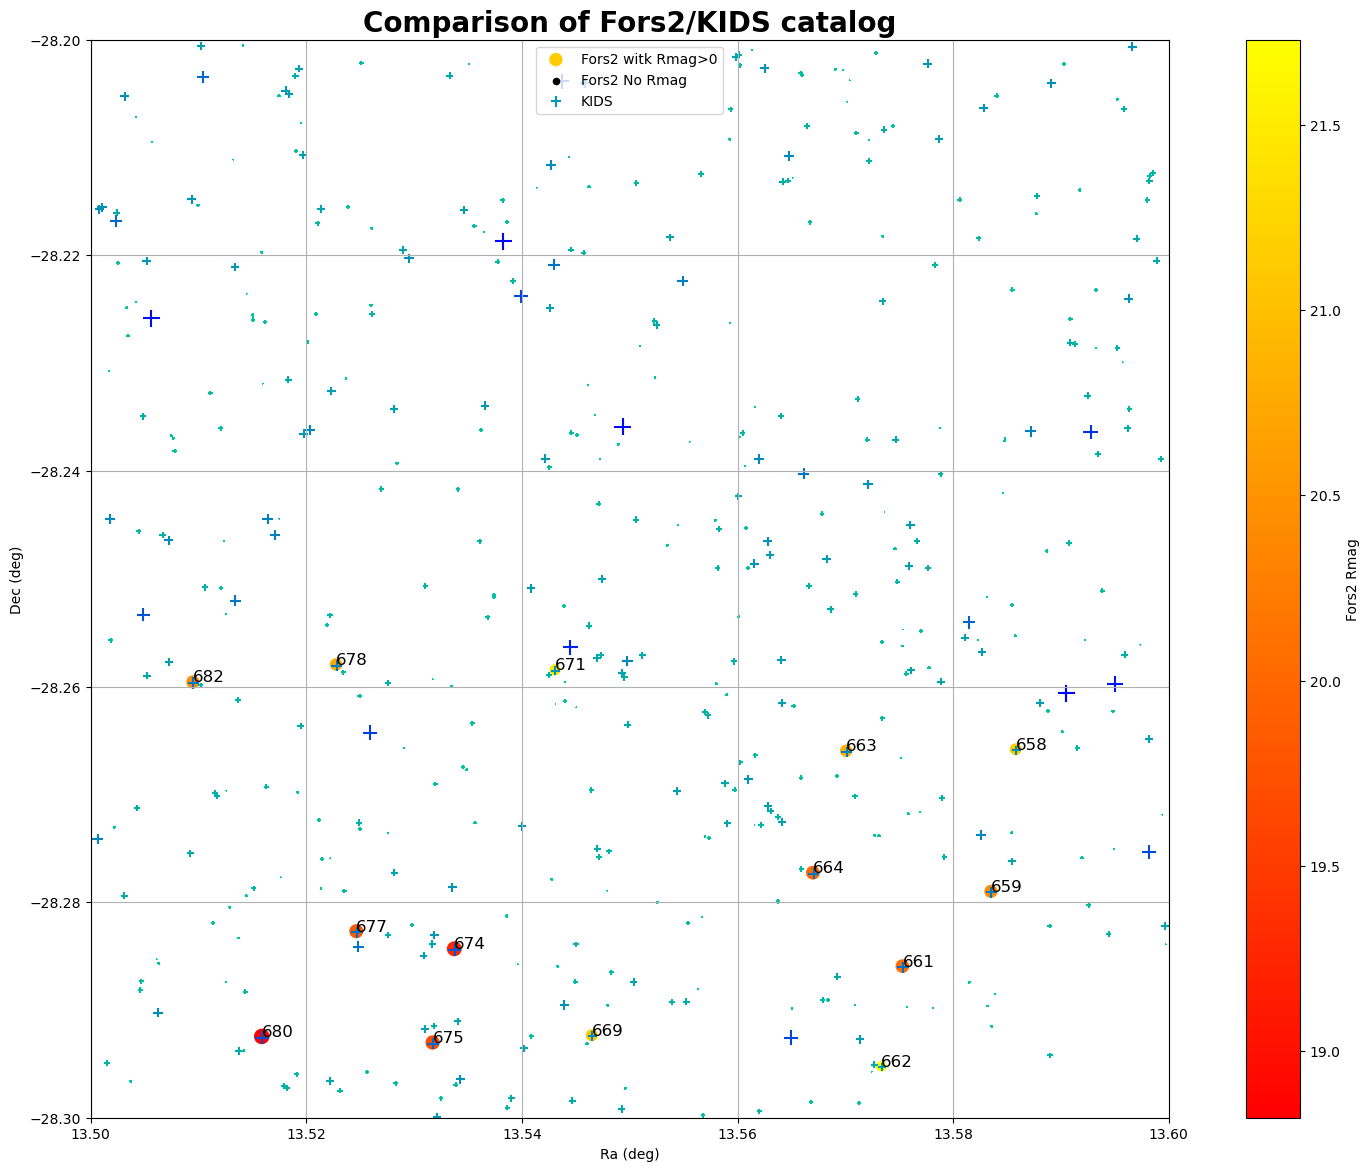

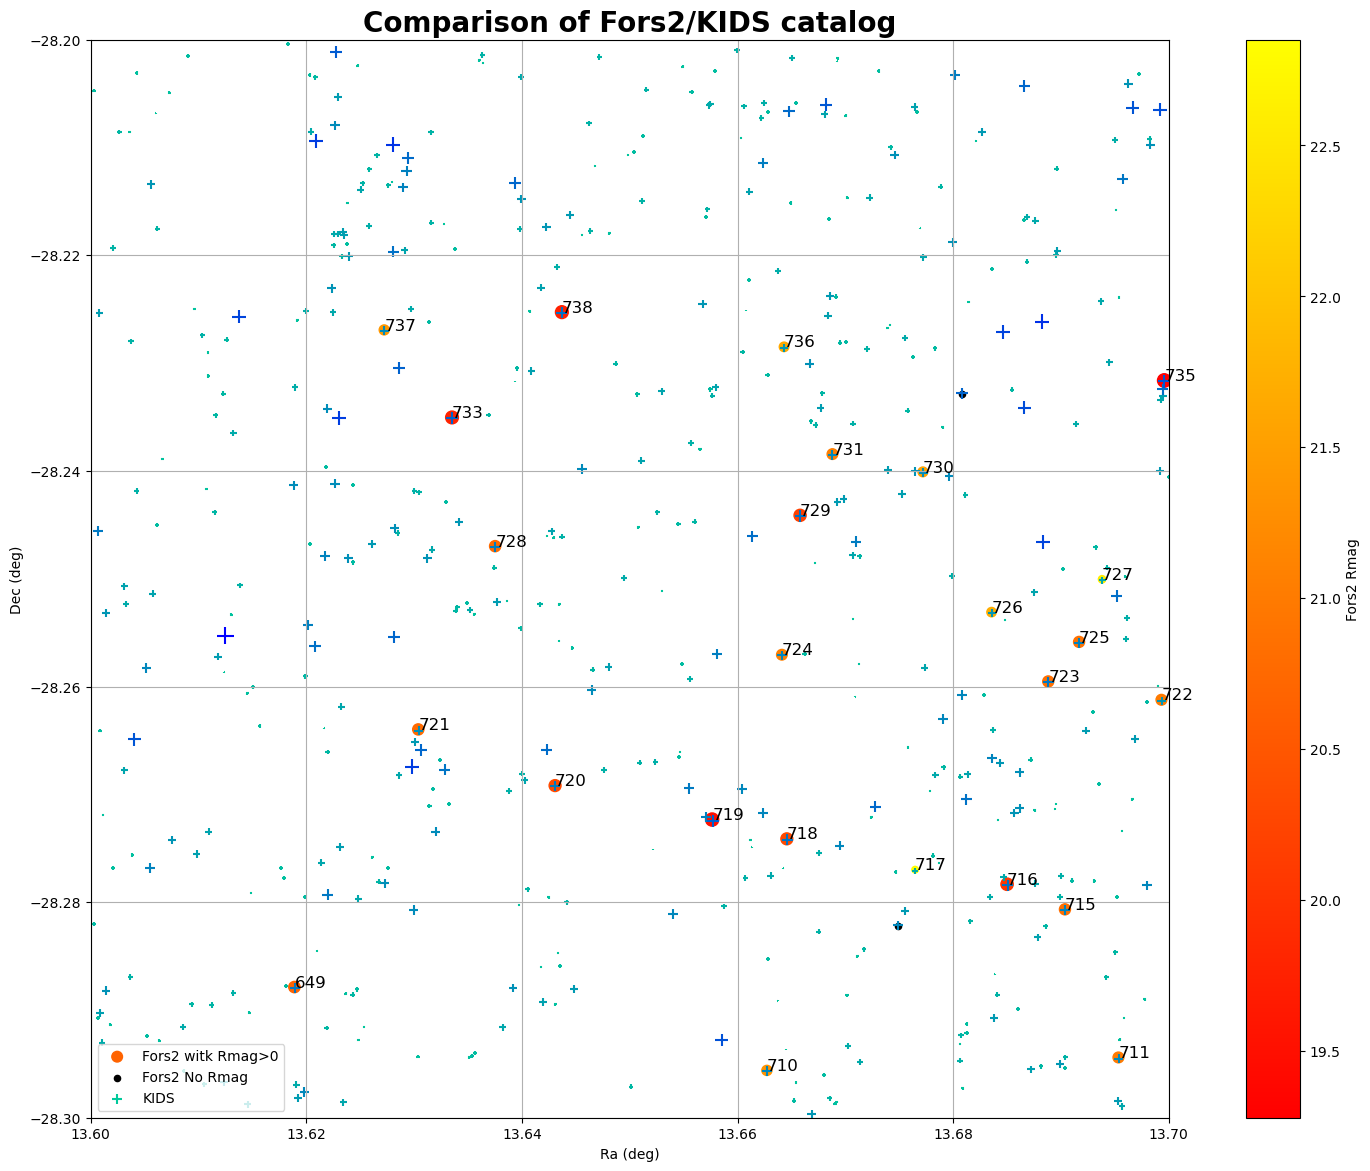

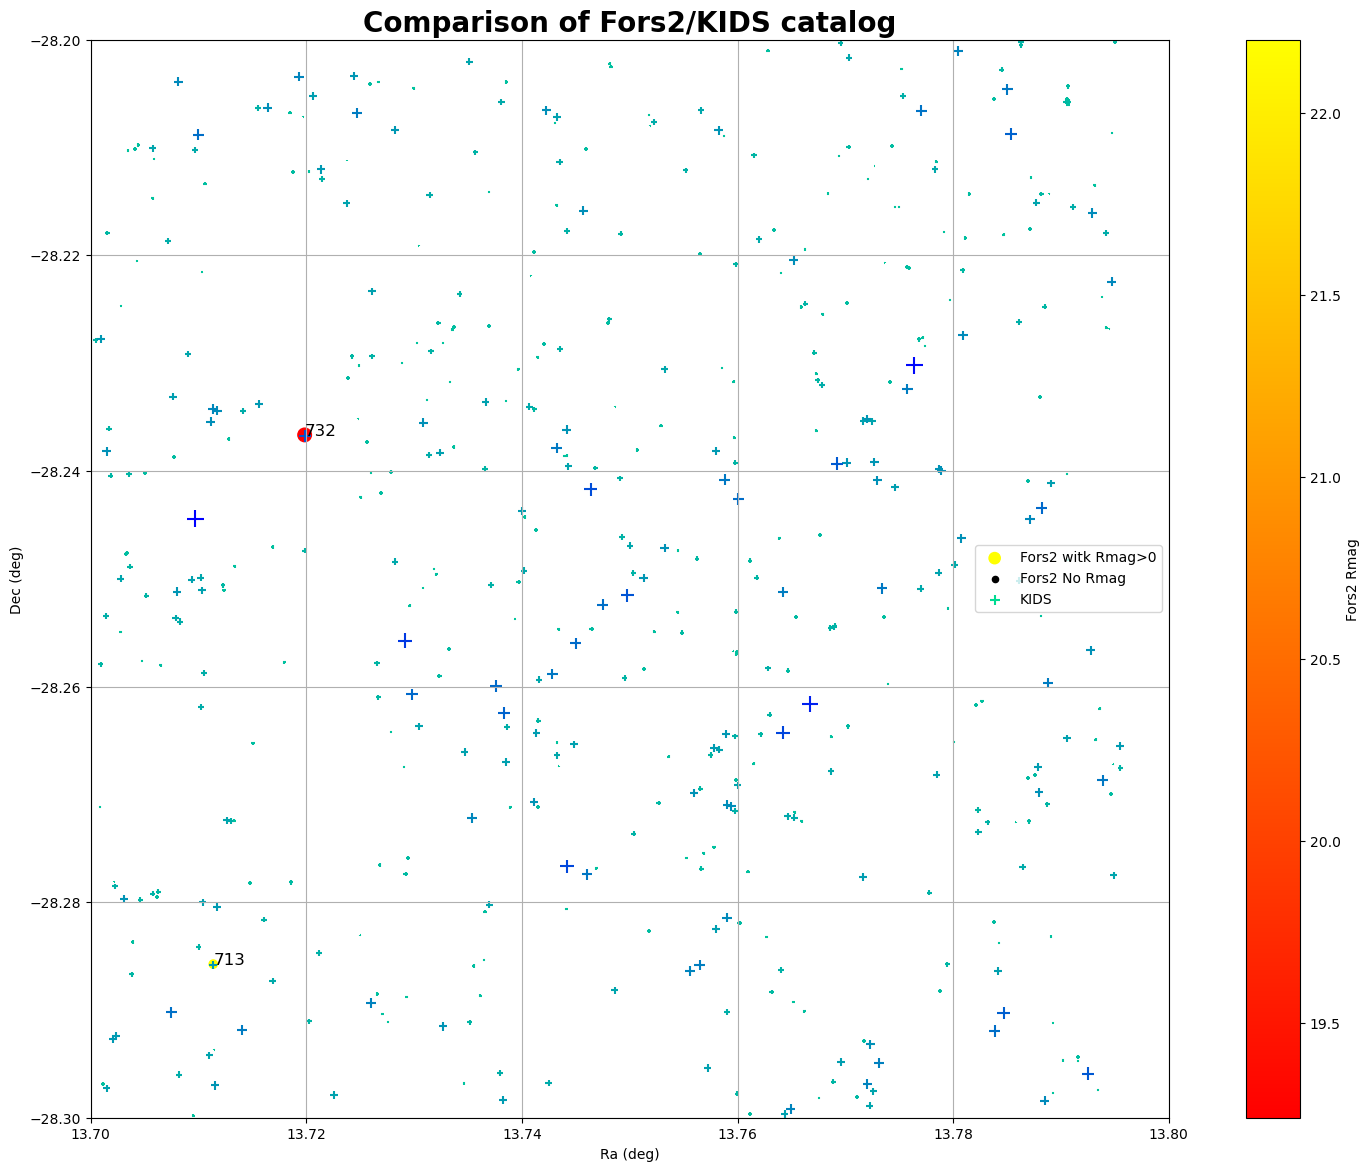

In [68]:
for idx_dec in range(NDEC):
    
    ymin = dec_slices[idx_dec]
    ymax = dec_slices[idx_dec+1]
    
    for idx_ra in range(NRA):
        xmin = ra_slices[idx_ra]
        xmax = ra_slices[idx_ra+1]
        
        # Fors2
        cut_f2 = (df_f2["ra"] >= xmin ) & (df_f2["ra"] <= xmax ) & (df_f2["dec"] >= ymin ) & (df_f2["dec"] <= ymax )
        df1 =  df_f2[cut_f2]
        siz1 =  20*(24 - df1.Rmag)
        
        
        
        
        # Kids
        cut_k = (df_kids["RAJ2000"] >= xmin ) & (df_kids["RAJ2000"] <= xmax ) & (df_kids["DECJ2000"] >= ymin ) & (df_kids["DECJ2000"] <= ymax )
        df2 =  df_kids[cut_k]
        siz2 =  20*(24 - df2["MAG_GAAP_r"])
        
        
        # plot patch of sky
     
        fig =plt.figure(figsize=(20,14))
        ax=fig.add_subplot(111)
        im = ax.scatter(df1.ra, df1.dec,c=df1.Rmag,cmap="autumn",s=siz1,label="Fors2 witk Rmag>0")
        im3 = ax.scatter(df_f2_rem.ra, df_f2_rem.dec,c="k",s=20,label="Fors2 No Rmag")
        im2 = ax.scatter(df2["RAJ2000"], df2["DECJ2000"],marker="+",c=df2['MAG_GAAP_r'],cmap="winter",s=siz2,label="KIDS")
        
        
        for idx,row in df1.iterrows():
            x = row["ra"]
            y = row["dec"]
            num = int(row["num"])
            dy = 0
            dx = 0
            
            
            #if num in df_info_selected.num.values:
            #    ax.text(x+dx,y+dy,str(num),fontsize=20,color="r")
            #else:
            ax.text(x+dx,y+dy,str(num),fontsize=12)
        
        

        cbar = plt.colorbar(im)
        cbar.set_label('Fors2 Rmag')

        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        ax.grid()
        ax.legend()
        ax.set_xlabel("Ra (deg)")
        ax.set_ylabel("Dec (deg)")
        ax.set_title("Comparison of Fors2/KIDS catalog",fontsize=20,fontweight="bold")
        plt.gca().set_aspect('equal')
    
        plt.show()
      
    

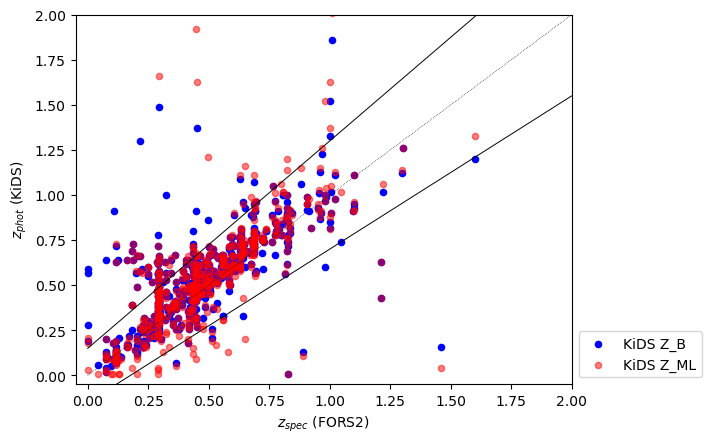

In [69]:
f,a = plt.subplots(1,1)
zrange = np.linspace(0., 2.)
df_info_concatenated.plot.scatter("redshift","Z_B", label="KiDS Z_B", color="b", ax=a)
df_info_concatenated.plot.scatter("redshift","Z_ML", label="KiDS Z_ML", color="r", ax=a, alpha=0.5)
a.set_xlim(-0.05, 2.)
a.set_ylim(-0.05, 2.)
a.set_ylabel("$z_{phot}$ (KiDS)")
a.set_xlabel("$z_{spec}$ (FORS2)")
a.plot(zrange, zrange, 'k:', lw=0.5)
a.plot(zrange, 0.15+zrange*1.15, 'k-', lw=0.7)
a.plot(zrange, zrange*0.85-0.15, 'k-', lw=0.7)
a.legend(loc='lower left', bbox_to_anchor=(1.0, 0.))

In [70]:
df_info_concatenated["Delta_ZB"] = (df_info_concatenated["Z_B"]-df_info_concatenated["redshift"])/(1+df_info_concatenated["redshift"])
df_info_concatenated["Delta_ZML"] = (df_info_concatenated["Z_ML"]-df_info_concatenated["redshift"])/(1+df_info_concatenated["redshift"])

(array([  2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,
          0.,   0.,   1.,   1.,   3.,   4.,   4.,  14.,  27.,  45., 115.,
        119.,  59.,  48.,  30.,  20.,  10.,   8.,   7.,   7.,   3.,   1.,
          3.,   3.,   3.,   0.,   2.,   1.,   2.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([-0.70223916, -0.66968436, -0.63712956, -0.60457476, -0.57201996,
        -0.53946516, -0.50691035, -0.47435555, -0.44180075, -0.40924595,
        -0.37669115, -0.34413635, -0.31158155, -0.27902675, -0.24647194,
        -0.21391714, -0.18136234, -0.14880754, -0.11625274, -0.08369794,
        -0.05114314, -0.01858834,  0.01396647,  0.04652127,  0.07907607,
         0.11163087,  0.14418567,  0.17674047,  0.20929527,  0.24185007,
         0.27440488,  0.30695968,  0.33951448,  0.37206928,  0.40462408,
         0.43717888,  0.46973368,  0.50228848,  0.53484329,  0.56739809,
         0.59995289,  0.63250769,  0.66506249,  0.69761729,  0.73017209,
 

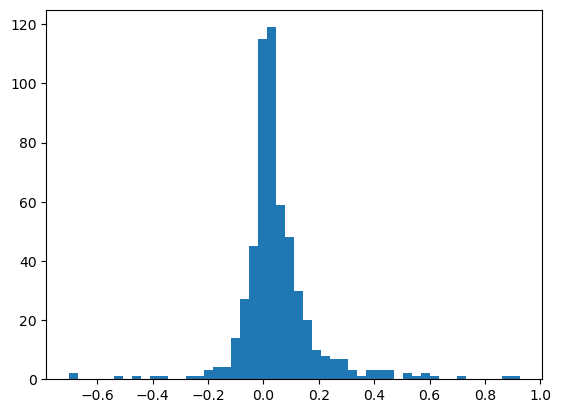

In [71]:
plt.hist(df_info_concatenated["Delta_ZB"], bins=50)

(array([  2.,   1.,   2.,   5.,  19., 100., 294.,  87.,  22.,   6.,   5.,
          0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.70018564, -0.58615792, -0.4721302 , -0.35810249, -0.24407477,
        -0.13004705, -0.01601933,  0.09800838,  0.2120361 ,  0.32606382,
         0.44009154,  0.55411925,  0.66814697,  0.78217469,  0.89620241,
         1.01023013,  1.12425784,  1.23828556,  1.35231328,  1.466341  ,
         1.58036871,  1.69439643,  1.80842415,  1.92245187,  2.03647958,
         2.1505073 ,  2.26453502,  2.37856274,  2.49259045,  2.60661817,
         2.72064589,  2.83467361,  2.94870132,  3.06272904,  3.17675676,
         3.29078448,  3.40481219,  3.51883991,  3.63286763,  3.74689535,
         3.86092306,  3.97495078,  4.0889785 ,  4.20300622,  4.31703393,
 

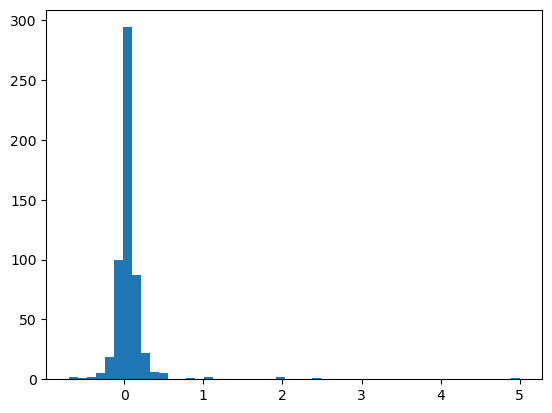

In [72]:
plt.hist(df_info_concatenated["Delta_ZML"], bins=50)

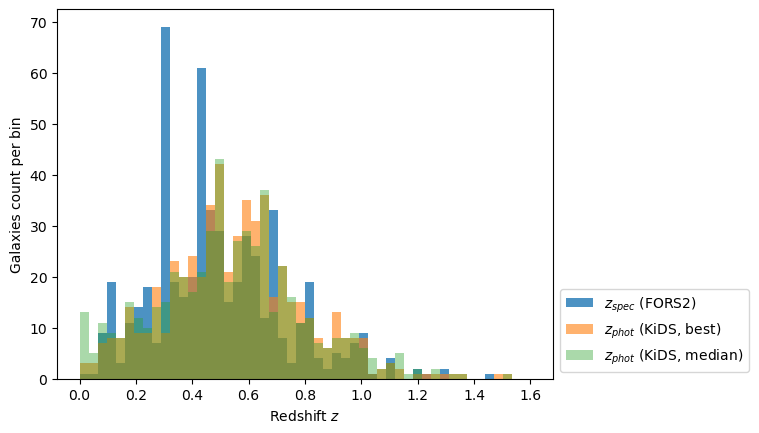

In [73]:
f,a = plt.subplots(1,1)
counts, edges = np.histogram(df_info_concatenated["redshift"], bins=50, range=(0., 1.6))
a.hist(df_info_concatenated["redshift"], bins=edges, alpha=0.8, label="$z_{spec}$ (FORS2)")
a.hist(df_info_concatenated["Z_B"], bins=edges, alpha=0.6, label="$z_{phot}$ (KiDS, best)")
a.hist(df_info_concatenated["Z_ML"], bins=edges, alpha=0.4, label="$z_{phot}$ (KiDS, median)")
a.set_xlabel("Redshift $z$")
a.set_ylabel("Galaxies count per bin")
a.legend(loc='lower left', bbox_to_anchor=(1.0, 0.))

In [74]:
sig_delta_zb = np.std(df_info_concatenated["Delta_ZB"])
med_delta_zb = np.median(df_info_concatenated["Delta_ZB"])
print(med_delta_zb)
df_info_concatenated["z_selected"] = (np.abs(df_info_concatenated["Delta_ZB"])<0.6*sig_delta_zb)

0.028027185598822675


<AxesSubplot: xlabel='Delta_ZB', ylabel='Count'>

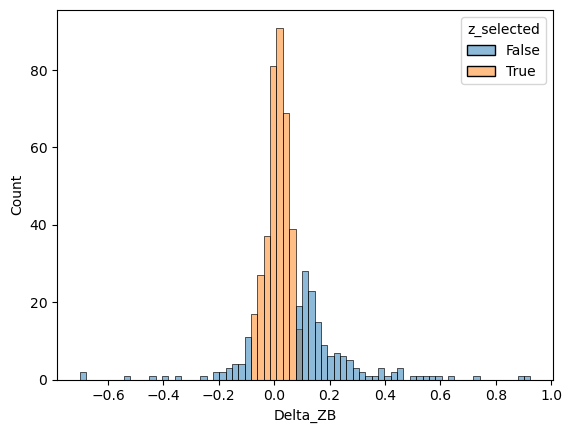

In [75]:
import seaborn as sns
sns.histplot(data=df_info_concatenated, x="Delta_ZB", hue="z_selected")

<AxesSubplot: xlabel='Delta_ZML', ylabel='Count'>

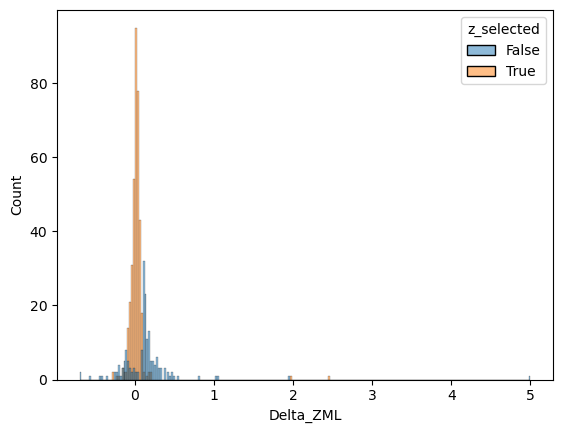

In [76]:
sns.histplot(data=df_info_concatenated, x="Delta_ZML", hue="z_selected")

<AxesSubplot: xlabel='redshift', ylabel='Z_B'>

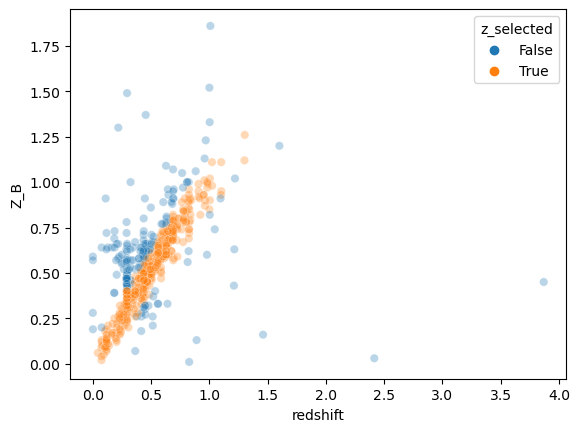

In [78]:
sns.scatterplot(data=df_info_concatenated, x="redshift", y="Z_B", hue="z_selected", alpha=0.3)

In [79]:
df_info_concatenated[df_info_concatenated["z_selected"]]

num        ra       dec   Rmag  redshift                              ID   
1      3  13.52552 -28.42080  21.45   0.68660  KiDSDR4 J005406.135-282515.22   \
2      9  13.50219 -28.40641  21.60   0.29266  KiDSDR4 J005400.531-282423.36    
3     13  13.49261 -28.38272  23.14   0.68870  KiDSDR4 J005358.235-282258.04    
4     19  13.60758 -28.43452  21.70   0.48395  KiDSDR4 J005425.830-282604.52    
6     25  13.59405 -28.44029  22.34   0.44810  KiDSDR4 J005422.577-282625.34    
..   ...       ...       ...    ...       ...                             ...   
544  733  13.63351 -28.23504  19.77   0.19553  KiDSDR4 J005432.046-281406.40    
545  734  13.68083 -28.23290   0.00   0.23012  KiDSDR4 J005443.393-281358.14    
546  735  13.69958 -28.23161  19.28   0.36169  KiDSDR4 J005447.902-281354.13    
547  736  13.66431 -28.22849  21.64   0.55777  KiDSDR4 J005439.434-281343.01    
549  738  13.64370 -28.22527  19.73   0.56044  KiDSDR4 J005434.488-281331.13    

            KIDS_TILE    RAJ2000   DECJ2000 FLUX_RADIUS  ...   Z_B  Z_ML   
1    KIDS_13.5_-28.2   13.525566 -28.420897    3.020974  ...  0.76  0.76  \
2    KIDS_13.5_-28.2   13.502216 -28.406491    2.671784  ...  0.38  0.24   
3    KIDS_13.5_-28.2   13.492649  -28.38279    2.192928  ...  0.79  0.79   
4    KIDS_13.5_-28.2   13.607625 -28.434589    2.992076  ...  0.38  0.39   
6    KIDS_13.5_-28.2   13.594072 -28.440373    2.430593  ...  0.51  0.51   
..                ...        ...        ...         ...  ...   ...   ...   
544  KIDS_13.5_-28.2   13.633526 -28.235113    3.987998  ...  0.14  0.14   
545  KIDS_13.5_-28.2   13.680807 -28.232817    3.462931  ...  0.16  0.15   
546  KIDS_13.5_-28.2   13.699594 -28.231703    3.587435  ...   0.4   0.4   
547  KIDS_13.5_-28.2   13.664309 -28.228614    4.769248  ...  0.55  0.56   
549  KIDS_13.5_-28.2   13.643701 -28.225315    7.467356  ...  0.61  0.61   

    EXTINCTION_u EXTINCTION_g EXTINCTION_r EXTINCTION_i angularsep  Delta_ZB   
1       0.075065      0.05849     0.040463     0.030069   0.378354   0.04352  \
2       0.074299     0.057893      0.04005     0.029762   0.303000  0.067566   
3       0.077572     0.060444     0.041815     0.031073   0.280645  0.059987   
4       0.075642      0.05894     0.040774       0.0303   0.286350  -0.07005   
6       0.074807     0.058289     0.040324     0.029965   0.306808  0.042746   
..           ...          ...          ...          ...        ...       ...   
544     0.078655     0.061287     0.042398     0.031506   0.267655 -0.046448   
545     0.073033     0.056906     0.039368     0.029254   0.307576 -0.057003   
546     0.072326     0.056356     0.038987     0.028971   0.337732  0.028134   
547     0.074087     0.057728     0.039936     0.029677   0.446411 -0.004988   
549     0.078741     0.061355     0.042445     0.031541   0.162031   0.03176   

    Delta_ZML z_selected  
1     0.04352       True  
2   -0.040738       True  
3    0.059987       True  
4   -0.063311       True  
6    0.042746       True  
..        ...        ...  
544 -0.046448       True  
545 -0.065132       True  
546  0.028134       True  
547  0.001432       True  
549   0.03176       True  

[374 rows x 57 columns]

In [80]:
df_info_concatenated.to_csv(outputfile)